<a href="https://colab.research.google.com/github/gomigom1068/YBIGTA_DA/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%B0%EB%8B%AC%EC%9D%8C%EC%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0%2B%ED%96%89%EC%95%88%EB%B6%80_%EA%B0%9C%ED%8F%90%EC%97%85_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a=[9,8,7,6,5]
a[3]

6

In [ ]:
from google.colab import output
!pip install chart_studio
!pip install pyecharts
!pip install echarts-themes-pypkg|
!pip install pyechart
output.clear()

In [ ]:
import pandas as pd
from pandas import Series
import numpy as np
from datetime import date

import matplotlib.pyplot as plt 
import seaborn as sns

import copy, json
import chart_studio
chart_studio.tools.set_credentials_file(username='username', api_key='api_key')

from IPython.display import IFrame
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio

from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Bar3D, Grid, Line, Liquid, Page, Pie, Timeline, Tab, Map, Grid
from pyecharts import options as opts

import folium, webbrowser, IPython, warnings
warnings.filterwarnings('ignore')

In [ ]:

x_data = ['Apple', 'Huawei', 'Xiaomi', 'Oppo', 'Vivo', 'Meizu']
y_data = [123, 153, 89, 107, 98, 23]


bar = (Bar()
       .add_xaxis(x_data)
       .add_yaxis('', y_data)
      )
IPython.display.HTML(filename = bar.render())

### **주최측 sc_shop/region 데이터**

In [ ]:
sc_region=pd.read_csv("/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/StartupOrClosing_Region_ver2.csv")
sc_shop=pd.read_csv("/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/StartupOrClosing_Shop_ver2.csv")

In [ ]:
pd.set_option('display.max_rows', 2000)

In [ ]:
sc_shop

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
0,1,20200101,CCTV,(주)실라전자,319013,1
1,2,20200101,가공식품도매(기타),송현동1986발효이야기,452199,1
2,3,20200101,가구판매(종합),더갤러리전주점,571100,1
3,4,20200101,가정부.파출부소개,모두인력파출,839103,1
4,5,20200101,가정부업알선,모두인력파출,839101,1
...,...,...,...,...,...,...
101779,101780,20200630,휴대폰,(주)엠.비텔레콤,581410,0
101780,101781,20200630,휴대폰,(주)지도,581410,0
101781,101782,20200630,휴대폰,대일통신,581410,0
101782,101783,20200630,휴대폰,이지더폰,581410,0


In [ ]:
sc_shop['INDUTY_CODEM']=sc_shop['INDUTY_CODEM'].astype(str)

In [ ]:
sc_food=sc_shop[sc_shop['INDUTY_CODEM'].str.startswith(pat='85')]

In [ ]:
mask=sc_food['INDUTY_NM'].isin(['가라오케','고양이카페','나이트클럽','라이브카페','룸살롱','보드카페',
                                '단란주점','락카페','문화카페','북카페','사주카페','세계맥주전문점',
                                '수제맥주','애견카페','영상가요주점','유흥주점','카바레','포장마차', 
                                '키즈카페','한식부페','채식부페','카페-슬라임','카페-힐링','카페-스터디 ',
                                '휴게소','호프','민속주점','소주방','바.칵테일','급식','부페','해물부페',
                                '샤브샤브부페','출장요리'])

In [ ]:
pd.set_option('display.max_rows', 400)

In [ ]:
sc_region

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
0,1,20200101,부동산,경기,용인시 처인구,봉명리,37.109***,127.131***,1
1,2,20200101,토목공학엔지니어링,인천,서구,오류동,37.598***,126.613***,1
2,3,20200101,한식,강원,영월군 영월읍,영흥리,37.187***,128.473***,1
3,4,20200101,보일러판매,대전,중구,목동,36.336***,127.403***,1
4,5,20200101,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
...,...,...,...,...,...,...,...,...,...
67252,67253,20200630,부동산,경남,김해시,삼문동,35.190***,128.810***,0
67253,67254,20200630,호프,경기,용인시 기흥구,공세동,37.240***,127.108***,0
67254,67255,20200630,떡볶이,경기,성남시 분당구,야탑동,37.412***,127.129***,0
67255,67256,20200630,악기제조(종합),인천,중구,관동3가,37.471***,126.624***,0


In [ ]:
sc_food

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
24,25,20200101,게요리,청진동간장게장,852147,1
43,44,20200101,국수,장모식탁노형점,852301,1
44,45,20200101,국수,제주둘레국수,852301,1
73,74,20200101,다방,별천지다방,854001,1
74,75,20200101,다방,여우다방,854001,1
...,...,...,...,...,...,...
101773,101774,20200630,횟집,왓다마차,852508,0
101774,101775,20200630,횟집,유정회타운,852508,0
101775,101776,20200630,횟집,제주횟집,852508,0
101776,101777,20200630,횟집,청호횟집,852508,0


In [ ]:
sc_food=sc_food[~mask]
sc_food

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
24,25,20200101,게요리,청진동간장게장,852147,1
43,44,20200101,국수,장모식탁노형점,852301,1
44,45,20200101,국수,제주둘레국수,852301,1
73,74,20200101,다방,별천지다방,854001,1
74,75,20200101,다방,여우다방,854001,1
...,...,...,...,...,...,...
101773,101774,20200630,횟집,왓다마차,852508,0
101774,101775,20200630,횟집,유정회타운,852508,0
101775,101776,20200630,횟집,제주횟집,852508,0
101776,101777,20200630,횟집,청호횟집,852508,0


In [ ]:
sc_food.reset_index(drop=True, inplace = True)

In [ ]:
to_dir= {'게요리':'한식', '국수':'한식', '다방':'카페/디저트','돈가스': '돈까스/일식', '돼지국밥':'한식',
         '스파게티':'아시안/양식', '피자': '피자','카페':'카페/디저트', '김밥': '분식', '떡볶이': '분식',
       '카페-디저트': '분식', '한식':'한식', '치킨': '치킨', '야식': '야식', 
        '육류.고기요리':'한식', '죽전문점':'한식','냉면':'한식','일식튀김.꼬치': '돈까스/일식' , '족발.보쌈': '족발/보쌈',
         '삼계탕': '찜탕','관광음식점':'한식', '중국음식': '중식','감자탕': '찜탕', '분식': '분식', '샤브샤브':'한식',
       '스테이크':'아시안/양식','장어':'한식', '양식':'아시안/양식', '닭발':'한식', '도시락':'도시락', 
       '일식': '돈까스/일식' , '돼지갈비':'한식', '샌드위치': '패스트푸드','삼겹살':'한식', '순대국밥':'한식', 
       '곱창.양구이':'한식', '비빕밥':'한식','한우고기':'한식', '한정식':'한식','과일주스전문점':'카페/디저트',
       '도너츠':'카페/디저트','막국수':'한식', '만두':'한식', '말고기':'한식', '밀면':'한식','베트남음식':'아시안/양식',
        '불닭':'한식', '사철.영양탕': '찜탕','수산물음식점':'한식', '순대.순대국':'한식', '아귀요리':'한식',
        '오리고기':'한식', '음식점-생태/동태/명태요리전문':'한식','음식점-이자카야': '돈까스/일식' , '쭈꾸미요리':'한식',
         '칼국수':'한식','패스트푸드(종합)': '패스트푸드',  '핫도그':'카페/디저트','횟집': '회','흑돼지':'한식', 
         '낙지요리':'한식', '닭요리':'한식', '대구탕': '찜탕','두부요리':'한식', '라면': '분식', '막창':'한식', 
         '버섯요리':'한식', '부대찌개':'한식','설렁탕':'한식', '시락국밥':'한식', '양고기':'한식', '찜닭': '찜탕',
        '토스트': '패스트푸드', '한식배달':'한식', '해물.생선요리':'한식','기사식당':'한식','꽈배기전문':'카페/디저트',
         '동남아음식':'아시안/양식', '매운탕': '찜탕','복어요리':'한식', '소머리국밥':'한식','전복요리':'한식', '해장국':'한식',
         '햄버거': '패스트푸드','갈비탕': '찜탕', '고기부페':'한식', '고래고기': '회', '곰탕': '찜탕','과메기':'한식',
         '굴요리':'한식', '꿩고기':'한식', '다슬기요리':'한식', '닭갈비':'한식','닭강정': '치킨', '떡갈비':'한식', 
         '로바다야끼': '돈까스/일식' , '메밀요리':'한식','멕시코요리':'아시안/양식','반찬가게':'한식', '백숙':'한식',
         '보리밥':'한식','붕어찜': '찜탕', '브런치카페':'카페/디저트', '샐러드전문점': '패스트푸드', '순두부':'한식', 
       '스페인요리':'아시안/양식','쌈밥':'한식', '어죽':'한식', '어탕': '찜탕', '오뎅바': '돈까스/일식' ,
       '오리요리':'한식', '오징어요리':'한식', '와플전문점':'카페/디저트','우동': '돈까스/일식' ,'육개장전문':'한식',
       '음식점-고로케전문': '돈까스/일식' ,'음식점-닭요리전문':'한식','음식점-마라탕': '중식', '이탈리아요리':'아시안/양식',
         '인도음식':'아시안/양식','전.빈대떡.부침':'한식','전통찻집':'카페/디저트', '제사음식':'한식','조개구이':'한식',
         '주먹밥': '분식', '찌개.전골':'한식', '참치요리' : '돈까스/일식' ,'철판구이':'한식', '초밥.롤': '돈까스/일식',
         '초밥부페': '돈까스/일식' , '추어탕': '찜탕','카레':'아시안/양식', '코다리전문':'한식', '콩국수':'한식','콩나물국밥':'한식',
         '콩요리':'한식','태국음식':'아시안/양식', '패밀리레스토랑':'아시안/양식', '패스트푸드(기타)': '패스트푸드', 
         '퓨전음식':'아시안/양식','홍어': '회', '흑염소':'한식', '감자튀김': '패스트푸드','멧돼지고기':'한식', '해물부페':'한식',
       '화덕피자전문': '피자', '바닷가재요리':'아시안/양식', '소고기국밥':'한식', '프랑스요리':'아시안/양식', 
       '호떡':'카페/디저트', '문어요리':'한식','연어전문': '회','빵.과자' : '카페/디저트', '제과점' : '카페/디저트',
       '음식배달대행' : ''
        }

In [ ]:
sc_food['category'] = sc_food['INDUTY_NM'].apply(lambda x : to_dir[x])
sc_food

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division,category
0,25,20200101,게요리,청진동간장게장,852147,1,한식
1,44,20200101,국수,장모식탁노형점,852301,1,한식
2,45,20200101,국수,제주둘레국수,852301,1,한식
3,74,20200101,다방,별천지다방,854001,1,카페/디저트
4,75,20200101,다방,여우다방,854001,1,카페/디저트
...,...,...,...,...,...,...,...
15193,101774,20200630,횟집,왓다마차,852508,0,회
15194,101775,20200630,횟집,유정회타운,852508,0,회
15195,101776,20200630,횟집,제주횟집,852508,0,회
15196,101777,20200630,횟집,청호횟집,852508,0,회


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
sc_food

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division,category
0,25,20200101,게요리,청진동간장게장,852147,1,한식
1,44,20200101,국수,장모식탁노형점,852301,1,한식
2,45,20200101,국수,제주둘레국수,852301,1,한식
3,74,20200101,다방,별천지다방,854001,1,카페/디저트
4,75,20200101,다방,여우다방,854001,1,카페/디저트
...,...,...,...,...,...,...,...
15193,101774,20200630,횟집,왓다마차,852508,0,회
15194,101775,20200630,횟집,유정회타운,852508,0,회
15195,101776,20200630,횟집,제주횟집,852508,0,회
15196,101777,20200630,횟집,청호횟집,852508,0,회


In [ ]:
group1=sc_food[sc_food['DATE']<=20200228]
group2=sc_food[sc_food['DATE']>=20200229]

In [ ]:
groupby1=group1.groupby(['category','division']).size().reset_index()
groupby2=group2.groupby(['category','division']).size().reset_index()

In [ ]:
groupby.columns

NameError: ignored

In [ ]:
list=sc_food['category'].unique()

In [ ]:
groupby1.columns=['category','division','count']
groupby1

In [ ]:
sc_region_sudogwon = sc_region[(sc_region['BRTC_NM']=='경기') | (sc_region['BRTC_NM']=='서울') ]

In [ ]:
sc_region_sudogwon[sc_region_sudogwon['INDUTY_NM']=='프랜차이즈']

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
2614,2615,20200527,프랜차이즈,서울,강남구,삼성동,37.513***,127.064***,0
3400,3401,20200528,프랜차이즈,경기,화성시,안녕동,37.320***,126.989***,0
4872,4873,20200529,프랜차이즈,경기,과천시,중앙동,37.426***,126.984***,0
28479,28480,20200529,프랜차이즈,경기,구리시,사노동,37.637***,127.132***,0
42417,42418,20200529,프랜차이즈,경기,수원시 권선구,세류동,37.251***,127.014***,0
44013,44014,20200529,프랜차이즈,서울,강동구,암사1동,37.554***,127.129***,0
48080,48081,20200529,프랜차이즈,경기,수원시 권선구,권선동,37.258***,127.028***,0
52603,52604,20200529,프랜차이즈,서울,강남구,신사동,37.520***,127.023***,0
52858,52859,20200530,프랜차이즈,서울,서초구,서초동,37.486***,127.014***,1
54923,54924,20200530,프랜차이즈,서울,용산구,이태원동,37.534***,126.993***,0


In [ ]:
q[q[0]=='프랜차이즈']

NameError: ignored

In [ ]:
q=pd.DataFrame(sc_region_sudogwon['INDUTY_NM'].unique())
list =q.loc[[1,7,9,25,31,44,56,61,82,85,88,90,92,122,142,165,172,177,193,196,225,233,252,253,264,284,292,310,
324,332,347,365,377,385,401,414,425,440,443,463,468,487,511,512,514,531,534,573,576,
580,588,594,647,673,681,690,700,711,739,744,756,877,896,904,918,929,943,947,1025,1026,1037,
1134,1151,1170,1180,1191,1224,1299,1336,1343,1369,1391,1395,1473,1491,1500,1510,1533,1541,1549,1560,
1567,1593,1606,1610,1615,1633,1644,1645,1649,1653,1654,1655,1657,1660,1693,1720]]
list[0].tolist()

['햄버거',
 '카페',
 '치킨',
 '카페-디저트',
 '중국음식',
 '한식',
 '야식',
 '분식',
 '일식튀김.꼬치',
 '족발.보쌈',
 '삼계탕',
 '관광음식점',
 '일식',
 '감자탕',
 '장어',
 '돈가스',
 '김밥',
 '쭈꾸미요리',
 '닭발',
 '도시락',
 '빵.과자',
 '샤브샤브',
 '삼겹살',
 '양식',
 '한정식',
 '제과점',
 '수산물음식점',
 '떡볶이',
 '육류.고기요리',
 '패스트푸드(종합)',
 '음식점-생태/동태/명태요리전문',
 '칼국수',
 '횟집',
 '베트남음식',
 '사철.영양탕',
 '반찬가게',
 '한우고기',
 '해물.생선요리',
 '떡집',
 '돼지갈비',
 '부대찌개',
 '핫도그',
 '오리고기',
 '아이스크림',
 '피자',
 '순대.순대국',
 '해장국',
 '설렁탕',
 '매운탕',
 '전통찻집',
 '떡.한과',
 '청과물 ',
 '스테이크',
 '청과물',
 '음료제조(종합)',
 '참치요리',
 '아귀요리',
 '만두',
 '추어탕',
 '호두과자',
 '소머리국밥',
 '냉면',
 '닭요리',
 '닭갈비',
 '낙지요리',
 '패밀리레스토랑',
 '우동',
 '콩요리',
 '백숙',
 '닭집',
 '게요리',
 '두부요리',
 '국수',
 '이탈리아요리',
 '오리요리',
 '제과.제빵',
 '조개구이',
 '퓨전음식',
 '토스트',
 '곰탕',
 '샌드위치',
 '빙과류제조',
 '찌개.전골',
 '메밀요리',
 '쌈밥',
 '보리밥',
 '초밥.롤',
 '닭강정',
 '순두부',
 '도너츠',
 '채소가게',
 '양고기',
 '음식점-고로케전문',
 '음식점-닭요리전문',
 '태국음식',
 '스파게티',
 '음식점-마라탕',
 '찜닭',
 '굴요리',
 '흑돼지',
 '라면',
 '브런치카페',
 '불닭',
 '코다리전문',
 '돼지국밥',
 '과일주스전문점',
 '밀면']

In [ ]:
q

In [ ]:
mask2 = sc_region_sudogwon['INDUTY_NM'].isin(list[0].tolist())
mask2

0        False
6         True
7        False
15       False
18       False
         ...  
67247     True
67251    False
67253    False
67254     True
67256    False
Name: INDUTY_NM, Length: 23879, dtype: bool

In [ ]:
to_dir= {'게요리':'한식', '국수':'한식', '다방':'카페/디저트','돈가스': '돈까스/일식', '돼지국밥':'한식',
         '스파게티':'아시안/양식', '피자': '피자','카페':'카페/디저트', '김밥': '분식', '떡볶이': '분식',
       '카페-디저트': '카페/디저트', '한식':'한식', '치킨': '치킨', '야식': '야식', 
        '육류.고기요리':'한식', '죽전문점':'한식','냉면':'한식','일식튀김.꼬치': '돈까스/일식' , '족발.보쌈': '족발/보쌈',
         '삼계탕': '찜탕','관광음식점':'한식', '중국음식': '중식','감자탕': '찜탕', '분식': '분식', '샤브샤브':'한식',
       '스테이크':'아시안/양식','장어':'한식', '양식':'아시안/양식', '닭발':'한식', '도시락':'도시락', 
       '일식': '돈까스/일식' , '돼지갈비':'한식', '샌드위치': '패스트푸드','삼겹살':'한식', '순대국밥':'한식', 
       '곱창.양구이':'한식', '비빕밥':'한식','한우고기':'한식', '한정식':'한식','과일주스전문점':'카페/디저트',
       '도너츠':'카페/디저트','막국수':'한식', '만두':'한식', '말고기':'한식', '밀면':'한식','베트남음식':'아시안/양식',
        '불닭':'한식', '사철.영양탕': '찜탕','수산물음식점':'한식', '순대.순대국':'한식', '아귀요리':'한식',
        '오리고기':'한식', '음식점-생태/동태/명태요리전문':'한식','음식점-이자카야': '돈까스/일식' , '쭈꾸미요리':'한식',
         '칼국수':'한식','패스트푸드(종합)': '패스트푸드',  '핫도그':'카페/디저트','횟집': '회','흑돼지':'한식', 
         '낙지요리':'한식', '닭요리':'한식', '대구탕': '찜탕','두부요리':'한식', '라면': '분식', '막창':'한식', 
         '버섯요리':'한식', '부대찌개':'한식','설렁탕':'한식', '시락국밥':'한식', '양고기':'한식', '찜닭': '찜탕',
        '토스트': '패스트푸드', '한식배달':'한식', '해물.생선요리':'한식','기사식당':'한식','꽈배기전문':'카페/디저트',
         '동남아음식':'아시안/양식', '매운탕': '찜탕','복어요리':'한식', '소머리국밥':'한식','전복요리':'한식', '해장국':'한식',
         '햄버거': '패스트푸드','갈비탕': '찜탕', '고기부페':'한식', '고래고기': '회', '곰탕': '찜탕','과메기':'한식',
         '굴요리':'한식', '꿩고기':'한식', '다슬기요리':'한식', '닭갈비':'한식','닭강정': '치킨', '떡갈비':'한식', 
         '로바다야끼': '돈까스/일식' , '메밀요리':'한식','멕시코요리':'아시안/양식','반찬가게':'한식', '백숙':'한식',
         '보리밥':'한식','붕어찜': '찜탕', '브런치카페':'카페/디저트', '샐러드전문점': '과일/채소', '순두부':'한식', 
       '스페인요리':'아시안/양식','쌈밥':'한식', '어죽':'한식', '어탕': '찜탕', '오뎅바': '돈까스/일식' ,
       '오리요리':'한식', '오징어요리':'한식', '와플전문점':'카페/디저트','우동': '돈까스/일식' ,'육개장전문':'한식',
       '음식점-고로케전문': '돈까스/일식' ,'음식점-닭요리전문':'한식','음식점-마라탕': '중식', '이탈리아요리':'아시안/양식',
         '인도음식':'아시안/양식','전.빈대떡.부침':'한식','전통찻집':'카페/디저트', '제사음식':'한식','조개구이':'한식',
         '주먹밥': '분식', '찌개.전골':'한식', '참치요리' : '돈까스/일식' ,'철판구이':'한식', '초밥.롤': '돈까스/일식',
         '초밥부페': '돈까스/일식' , '추어탕': '찜탕','카레':'아시안/양식', '코다리전문':'한식', '콩국수':'한식','콩나물국밥':'한식',
         '콩요리':'한식','태국음식':'아시안/양식', '패밀리레스토랑':'아시안/양식', '패스트푸드(기타)': '패스트푸드', 
         '퓨전음식':'아시안/양식','홍어': '회', '흑염소':'한식', '감자튀김': '패스트푸드','멧돼지고기':'한식', '해물부페':'한식',
       '화덕피자전문': '피자', '바닷가재요리':'아시안/양식', '소고기국밥':'한식', '프랑스요리':'아시안/양식', 
       '호떡':'카페/디저트', '문어요리':'한식','연어전문': '회','빵.과자' : '카페/디저트', '제과점' : '카페/디저트',
       '떡집' : '카페/디저트','아이스크림' : '카페/디저트','떡.한과' : '카페/디저트', '청과물' : '과일/채소', '청과물 ' : '과일/채소',
       '음료제조(종합)' : '카페/디저트', '호두과자' :'카페/디저트' , '닭집' : '한식', '제과.제빵' : '카페/디저트', '빙과류제조' : '카페/디저트', '채소가게':'과일/채소'
        }

In [ ]:
sc_region_sudogwon

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION,category
6,7,20200102,햄버거,경기,용인시 처인구,완장리,37.156***,127.173***,1,패스트푸드
22,23,20200103,카페,서울,마포구,상암동,37.580***,126.889***,0,카페/디저트
24,25,20200104,치킨,경기,평택시,이충동,37.059***,127.065***,1,치킨
76,77,20200109,카페-디저트,서울,종로구,적선동,37.574***,126.973***,0,카페/디저트
96,97,20200114,중국음식,경기,하남시,망월동,37.568***,127.184***,1,중식
...,...,...,...,...,...,...,...,...,...,...
67167,67168,20200630,치킨,경기,성남시 중원구,성남동,37.435***,127.141***,0,치킨
67184,67185,20200630,닭발,경기,안산시 단원구,고잔동,37.318***,126.840***,0,한식
67227,67228,20200630,치킨,경기,수원시 권선구,곡반정동,37.235***,127.026***,0,치킨
67247,67248,20200630,한식,서울,성동구,행당동,37.559***,127.040***,0,한식


In [ ]:

sc_region_sudogwon = sc_region_sudogwon[mask2]
sc_region_sudogwon['category']=sc_region_sudogwon['INDUTY_NM'].apply(lambda x : to_dir[x])

In [ ]:
sc_region_before = sc_region_sudogwon[sc_region_sudogwon.DATE<20200229]
sc_region_after = sc_region_sudogwon[sc_region_sudogwon.DATE>=20200229]

In [ ]:
print(len(sc_region_before))
print(len(sc_region_after))

38
2739


## **행정안전부 업종별 개폐업 데이터**

In [ ]:
korea=pd.read_csv("/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/fulldata_07_24_04_P_일반음식점.csv",encoding='cp949')


In [ ]:
korea.shape

(1950134, 48)

In [ ]:
korea.head(1)

,번호,개방서비스명,개방서비스id,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총종업원수,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3600000,3600000-101-2014-00100,20140508,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,99.00,502831.0,광주광역시 서구 풍암동 682-1번지 (1층),"광주광역시 서구 송풍로17번길 5, 1층 (풍암동)",62052.0,라캄파넬라,20170207142150,I,2018-08-31 23:59:59.0,경양식,187771.639116,179969,경양식,NaN,NaN,NaN,NaN,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,99.0,NaN,NaN,NaN,NaN


In [ ]:
korea2 = pd.read_csv("/content/drive/MyDrive/YBIGTA/DA팀/DA 팀프로젝트 (2)/fulldata_07_24_05_P_휴게음식점.csv",encoding='cp949')

In [ ]:
korea.describe()

,번호,개방자치단체코드,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,휴업시작일자,휴업종료일자,재개업일자,소재지우편번호,도로명우편번호,좌표정보(x),남성종사자수,여성종사자수,총종업원수,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,보증액,시설총규모,홈페이지,Unnamed: 47
count,1.950134e+06,1.950134e+06,1.950134e+06,0.0,1.950134e+06,1.950134e+06,0.0,0.0,0.0,1.886166e+06,1.102899e+06,1.847456e+06,1.024796e+06,1.040118e+06,17800.0,48796.0,48792.0,48792.0,48792.0,48796.0,1.930612e+06,0.0,0.0
mean,9.750675e+05,4.039037e+06,2.004766e+07,NaN,2.302796e+00,1.651398e+00,NaN,NaN,NaN,4.164664e+05,2.887881e+04,2.449693e+05,1.908985e-01,3.212357e-01,0.0,0.0,0.0,0.0,0.0,0.0,7.562695e+01,NaN,NaN
std,5.629553e+05,8.640714e+05,1.703704e+05,NaN,9.530558e-01,4.765279e-01,NaN,NaN,NaN,2.055357e+05,1.865017e+04,7.703612e+04,1.007101e+00,1.025029e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.007716e+02,NaN,NaN
min,1.000000e+00,3.000000e+06,1.992000e+03,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,1.000110e+05,1.000000e+03,-9.184002e+03,-1.000000e+00,-1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,NaN,NaN
25%,4.875342e+05,3.290000e+06,1.998041e+07,NaN,1.000000e+00,1.000000e+00,NaN,NaN,NaN,2.009110e+05,1.211200e+04,1.918238e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.761000e+01,NaN,NaN
50%,9.750675e+05,3.820000e+06,2.004102e+07,NaN,3.000000e+00,2.000000e+00,NaN,NaN,NaN,4.299300e+05,2.649400e+04,2.074521e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,4.930000e+01,NaN,NaN
75%,1.462601e+06,4.640000e+06,2.013113e+07,NaN,3.000000e+00,2.000000e+00,NaN,NaN,NaN,6.078040e+05,4.600800e+04,3.045117e+05,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,9.142000e+01,NaN,NaN
max,1.950134e+06,6.520000e+06,9.187061e+07,NaN,3.000000e+00,2.000000e+00,NaN,NaN,NaN,7.998230e+05,6.364400e+04,5.461052e+05,1.200000e+02,1.120000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.080480e+05,NaN,NaN


In [ ]:
korea.isnull().sum()>

번호                   0
개방서비스명               0
개방서비스id              0
개방자치단체코드             0
관리번호                 0
인허가일자                0
인허가취소일자        1950134
영업상태구분코드             0
영업상태명                0
상세영업상태코드             0
상세영업상태명              0
폐업일자            679821
휴업시작일자         1950134
휴업종료일자         1950134
재개업일자          1950134
소재지전화           576874
소재지면적           139799
소재지우편번호          63968
소재지전체주소           4163
도로명전체주소         828100
도로명우편번호         847235
사업장명                 1
최종수정시점               0
데이터갱신구분              0
데이터갱신일자              0
업태구분명              173
좌표정보(x)         102678
좌표정보(y)         102678
위생업태명            19697
남성종사자수          925338
여성종사자수          910016
영업장주변구분명       1130637
등급구분명          1505319
급수시설구분명         656405
총종업원수          1932334
본사종업원수         1901338
공장사무직종업원수      1901342
공장판매직종업원수      1901342
공장생산직종업원수      1901342
건물소유구분명        1950127
보증액            1901338
월세액            1901336
다중이용업소여부         19521
시설총규모      

In [ ]:
korea2.isnull().sum()

번호                  0
개방서비스명              0
개방서비스id             0
개방자치단체코드            0
관리번호                0
인허가일자               0
인허가취소일자        470195
영업상태구분코드            0
영업상태명               0
상세영업상태코드            0
상세영업상태명             0
폐업일자           185858
휴업시작일자         470195
휴업종료일자         470195
재개업일자          470195
소재지전화          228225
소재지면적           35623
소재지우편번호         16125
소재지전체주소          1880
도로명전체주소        139611
도로명우편번호        144290
사업장명                0
최종수정시점              0
데이터갱신구분             0
데이터갱신일자             0
업태구분명              16
좌표정보(x)         20864
좌표정보(y)         20864
위생업태명            4273
남성종사자수         335187
여성종사자수         329908
영업장주변구분명       334231
등급구분명          401895
급수시설구분명        190291
총종업원수          464217
본사종업원수         459590
공장사무직종업원수      459590
공장판매직종업원수      459590
공장생산직종업원수      459590
건물소유구분명        470179
보증액            459596
월세액            459596
다중이용업소여부         4256
시설총규모            4256
전통업소지정번호       469469
전통업소주된음식  

In [ ]:
official = korea.drop(['번호','개방서비스명','개방서비스id','개방자치단체코드','관리번호','휴업시작일자','휴업종료일자','재개업일자','소재지전화','소재지면적','소재지우편번호','도로명우편번호','최종수정시점','데이터갱신구분','데이터갱신일자','좌표정보(x)','좌표정보(y)',
                       '영업장주변구분명','등급구분명','급수시설구분명','총종업원수','본사종업원수','공장사무직종업원수','공장판매직종업원수','공장생산직종업원수','건물소유구분명','보증액','월세액','전통업소지정번호','홈페이지','Unnamed: 47','전통업소주된음식','시설총규모',
                       '인허가취소일자','남성종사자수','여성종사자수'],axis=1)
official2 = korea2.drop(['번호','개방서비스명','개방서비스id','개방자치단체코드','관리번호','휴업시작일자','휴업종료일자','재개업일자','소재지전화','소재지면적','소재지우편번호','도로명우편번호','최종수정시점','데이터갱신구분','데이터갱신일자','좌표정보(x)','좌표정보(y)',
                       '영업장주변구분명','등급구분명','급수시설구분명','총종업원수','본사종업원수','공장사무직종업원수','공장판매직종업원수','공장생산직종업원수','건물소유구분명','보증액','월세액','전통업소지정번호','홈페이지','Unnamed: 47','전통업소주된음식','시설총규모',
                       '인허가취소일자','남성종사자수','여성종사자수'],axis=1)

In [ ]:
official2

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
0,20100316,1,영업/정상,1,영업,NaN,광주광역시 서구 화정동 334-123번지 (1층),"광주광역시 서구 월드컵4강로112번길 7-14 (화정동,(1층))",굿모닝토스트,일반조리판매,일반조리판매,N
1,20171218,1,영업/정상,1,영업,NaN,광주광역시 남구 월산동 901-30번지 1층,"광주광역시 남구 월산로151번길 10, 땡큐pc방 1층 (월산동)",엔젤pc,기타 휴게음식점,기타 휴게음식점,N
2,20180403,1,영업/정상,1,영업,NaN,광주광역시 남구 양림동 111-51번지 2층,"광주광역시 남구 제중로46번길 3-8, 2층 (양림동)",커피빌런,일반조리판매,일반조리판매,N
3,20180419,1,영업/정상,1,영업,NaN,"광주광역시 남구 진월동 294-17번지 광동빌딩, 2층","광주광역시 남구 서문대로 700, 광동빌딩 2층 (진월동)",블랑PC방,일반조리판매,일반조리판매,N
4,20180410,1,영업/정상,1,영업,NaN,광주광역시 남구 백운동 620-11번지 1층,"광주광역시 남구 독립로 30-3, 1층 (백운동)",석류나무,일반조리판매,일반조리판매,N
...,...,...,...,...,...,...,...,...,...,...,...,...
470190,20181210,3,폐업,2,폐업,20210607.0,서울특별시 구로구 구로동 573 NC백화점,"서울특별시 구로구 구로중앙로 152, NC백화점 지하1층 (구로동)",김민철 수제족발,기타 휴게음식점,기타 휴게음식점,N
470191,20210202,3,폐업,2,폐업,20210416.0,서울특별시 구로구 오류동 165-6,"서울특별시 구로구 서해안로24길 29, 1층 3호 (오류동)",제이쏭디저트,커피숍,커피숍,N
470192,20201209,3,폐업,2,폐업,20210716.0,울산광역시 남구 달동 1369-24,"울산광역시 남구 도산로139번길 18, 1층 101호 (달동)",청앤은,커피숍,커피숍,N
470193,20201209,3,폐업,2,폐업,20210202.0,경기도 광명시 일직동 515-1 자이타워 C동 117-10호,"경기도 광명시 새빛공원로 67, 자이타워 C동 117-10호 (일직동)",파스타입니다광명역점,일반조리판매,일반조리판매,N


In [ ]:
mask=official['업태구분명'].isin(['정종/대포집/소주방','호프/통닭','감성주점','라이브카페','키즈카페','도매업(유통)','룸살롱','간이주점','식품소분업','식품제조가공업','식품자동판매기영업', '전화권유판매', '집단급식소 식품판매업',
                              '식품첨가물제조업','방문판매'])
official=official[~mask]
len(official)

1714458

In [ ]:
mask2= official2['업태구분명'].isin(['편의점','키즈카페','철도역구내','극장','과자점','고속도로','관광호텔','유원지','단란주점','공항','호프/통닭','룸살롱'])
official2=official2[~mask2]
len(official2)

402832

In [ ]:
official[official.상세영업상태코드==1].sort_values('인허가일자', ascending=False)

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
479164,20210730,1,영업/정상,1,영업,NaN,대구광역시 수성구 수성동2가 157-7 1층,"대구광역시 수성구 수성로68길 29, 1층 (수성동2가)",칠성반고개무침회,한식,한식,N
479144,20210730,1,영업/정상,1,영업,NaN,서울특별시 영등포구 양평동1가 71,"서울특별시 영등포구 선유동1로 13-12, 1층 (양평동1가)",고기고집 문래양평점,한식,한식,N
481242,20210730,1,영업/정상,1,영업,NaN,"경기도 안산시 상록구 사사동 48-6 1,2층","경기도 안산시 상록구 사사안골2길 14, 1,2층 (사사동)[*미고시]",카페 안고르,기타,기타,N
481241,20210730,1,영업/정상,1,영업,NaN,대구광역시 달서구 용산동 444-14,"대구광역시 달서구 새동네로 91, 1층 (용산동)",우량축산식당,한식,한식,N
481240,20210730,1,영업/정상,1,영업,NaN,대구광역시 달서구 이곡동 1246 코리아나호텔,"대구광역시 달서구 이곡동로 7, 코리아나호텔 1층 102호 (이곡동)",지금,한식,한식,N
...,...,...,...,...,...,...,...,...,...,...,...,...
101347,199404,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 관양동 1479-4번지,"경기도 안양시 동안구 벌말로 187-17 (관양동, 1층)",홍경백함흥냉면,분식,분식,N
101580,199310,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 비산동 1038-15번지,경기도 안양시 동안구 평촌대로374번길 25 (비산동),애향회센타,일식,일식,N
101824,199211,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 관양동 1589-1번지 한가람신라상가 101호,"경기도 안양시 동안구 관평로 227 (관양동, 한가람신라상가 101호)",행복김밥제작소,김밥(도시락),김밥(도시락),N
43463,1997,1,영업/정상,1,영업,NaN,경기도 안양시 만안구 안양동 674-261번지,경기도 안양시 만안구 장내로143번길 15 (안양동),와이비푸드(YB FOOD),기타,기타,Y


In [ ]:
official.reset_index(drop=True, inplace = True)
official2.reset_index(drop=True, inplace = True)

## **일반음식점데이터**

In [ ]:
off_seoul=official[official['소재지전체주소'].str.contains('서울특별시',na=False)]
off_gyeong=official[official['소재지전체주소'].str.contains('경기도',na=False)]
off_daegu=official[official['소재지전체주소'].str.contains('대구광역시',na=False)]

off2_seoul=official2[official2['소재지전체주소'].str.contains('서울특별시',na=False)]
off2_gyeong=official2[official2['소재지전체주소'].str.contains('경기도',na=False)]
off2_daegu=official2[official2['소재지전체주소'].str.contains('대구광역시',na=False)]

In [ ]:
official.업태구분명.unique()

array(['경양식', '한식', '기타', '김밥(도시락)', '중국식', '까페', '뷔페식', '분식', '일식',
       '패밀리레스트랑', '외국음식전문점(인도,태국등)', '식육(숯불구이)', '횟집', '통닭(치킨)', '패스트푸드',
       '회집', '탕류(보신용)', '전통찻집', '복어취급', '출장조리', '냉면집', nan, '기타 휴게음식점',
       '커피숍', '이동조리', '일반조리판매', '식품등 수입판매업', '관광호텔', '편의점', '제과점영업',
       '즉석판매제조가공업', '다방', '193959.150482967'], dtype=object)

In [ ]:
off_seoul[off_seoul.업태구분명=='기타'].head(10)

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
36226,20200803,1,영업/정상,1,영업,NaN,서울특별시 광진구 구의동 591-22 강변리버빌101호,"서울특별시 광진구 뚝섬로67길 35, 1층 101호 (구의동, 강변리버빌)",미드나잇,기타,기타,N
36227,20200803,1,영업/정상,1,영업,NaN,서울특별시 광진구 광장동 322-6,"서울특별시 광진구 아차산로76가길 5, 1층 (광장동)",37.5광진점,기타,기타,N
49339,20141121,1,영업/정상,1,영업,NaN,서울특별시 은평구 갈현동 452-27번지 1층,"서울특별시 은평구 연서로29길 25-7 (갈현동, 1층)",숙이네 칼국수,기타,기타,N
49356,19950217,1,영업/정상,1,영업,NaN,서울특별시 영등포구 신길동 110-26번지,서울특별시 영등포구 도신로68길 8 (신길동),화로마당,기타,기타,N
49361,19871028,1,영업/정상,1,영업,NaN,서울특별시 성북구 동선동1가 4-11,"서울특별시 성북구 동소문로20다길 4, 1층 (동선동1가)",수라간 이야기 성신여대점,기타,기타,N
49367,19991117,1,영업/정상,1,영업,NaN,서울특별시 은평구 갈현동 400-20번지,서울특별시 은평구 연서로29길 14-7 (갈현동),역전할머니맥주,기타,기타,N
49373,20020321,1,영업/정상,1,영업,NaN,서울특별시 종로구 명륜2가 149,"서울특별시 종로구 성균관로 12-3, 1층 (명륜2가)",비비큐,기타,기타,N
49375,20020322,1,영업/정상,1,영업,NaN,서울특별시 종로구 명륜2가 121-1,"서울특별시 종로구 성균관로6길 9, 지하1,지상1층 (명륜2가)",페르시아궁전,기타,기타,N
49400,20010407,1,영업/정상,1,영업,NaN,서울특별시 서초구 양재동 291-18 1층,"서울특별시 서초구 동산로 67, 1층 (양재동)",피자마루 양재매헌점,기타,기타,N
49412,19890908,1,영업/정상,1,영업,NaN,서울특별시 용산구 용문동 8-92번지 (지상1층),"서울특별시 용산구 효창원로 112 (용문동,(지상1층))",빨간여우,기타,기타,N


In [ ]:
official.groupby('업태구분명').size()

업태구분명
193959.150482967         1
간이주점                     4
감성주점                   677
경양식                 110737
관광호텔                     3
기타                  182099
기타 휴게음식점                20
김밥(도시락)               8502
까페                   22470
냉면집                   1120
다방                       5
도매업(유통)                  1
라이브카페                 1228
룸살롱                      6
방문판매                     1
복어취급                  1290
분식                  172682
뷔페식                   9964
식육(숯불구이)             61948
식품등 수입판매업                2
식품소분업                    1
식품자동판매기영업                1
식품제조가공업                  1
식품첨가물제조업                 1
외국음식전문점(인도,태국등)       5417
이동조리                   924
일반조리판매                  17
일식                   45322
전통찻집                  2319
전화권유판매                   1
정종/대포집/소주방           41859
제과점영업                    4
중국식                  61598
즉석판매제조가공업                6
집단급식소 식품판매업              1
출장조리                  1013
커피숍                   

In [ ]:
off2_seoul.업태구분명.unique()

array(['커피숍', '일반조리판매', '기타 휴게음식점', '편의점', '패스트푸드', '아이스크림', '푸드트럭',
       '키즈카페', '백화점', '철도역구내', '전통찻집', '떡카페', '다방', '극장', '과자점', '고속도로',
       '관광호텔', '유원지', '단란주점', '공항', '호프/통닭', '기타', '한식', '김밥(도시락)', '룸살롱'],
      dtype=object)

In [ ]:
len(korea2)

470195

In [ ]:
off_seoul.sort_values('인허가일자',ascending=True)

,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,남성종사자수,여성종사자수,다중이용업소여부,시설총규모,전통업소주된음식
1806793,11981207,NaN,3,폐업,2,폐업,20000121,서울특별시 구로구 구로동 732-2번지,NaN,쏘나타,한식,한식,1.0,2.0,N,153.09,NaN
1039532,16750325,NaN,3,폐업,2,폐업,20050125,서울특별시 성동구 상왕십리동 775번지,NaN,삼우당,한식,한식,0.0,2.0,N,54.75,NaN
1800378,17760827,NaN,3,폐업,2,폐업,19920831,서울특별시 구로구 구로동 1175-10번지,NaN,전주식당,한식,한식,NaN,NaN,N,0.00,NaN
1474388,18991230,NaN,3,폐업,2,폐업,20040621,서울특별시 도봉구 창동 657-83번지,NaN,전주식당,한식,한식,1.0,1.0,N,35.00,NaN
166545,18991230,NaN,1,영업/정상,1,영업,NaN,서울특별시 용산구 이태원동 225-112번지 (지상1층),"서울특별시 용산구 회나무로13길 10 (이태원동,(지상1층))",후렌드치킨,한식,한식,0.0,0.0,N,25.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481057,20210730,NaN,1,영업/정상,1,영업,NaN,서울특별시 강서구 등촌동 647-86 2층,"서울특별시 강서구 공항대로61길 21, 2층 (등촌동)",쌍백리,경양식,경양식,0.0,0.0,N,92.72,NaN
481056,20210730,NaN,1,영업/정상,1,영업,NaN,서울특별시 강서구 화곡동 163-30 애즈무드 1층 102호,"서울특별시 강서구 강서로18길 122-16, 1층 102호 (화곡동, 애즈무드)",카페화곡,한식,한식,0.0,0.0,N,13.20,NaN
481055,20210730,NaN,1,영업/정상,1,영업,NaN,서울특별시 강서구 마곡동 797-1 퀸즈파크나인 136호,"서울특별시 강서구 공항대로 247, 퀸즈파크나인 1층 136호 (마곡동)",청춘꼬마김밥앤떡볶이 마곡퀸즈파크나인점,분식,분식,0.0,0.0,N,44.60,NaN
481052,20210730,NaN,1,영업/정상,1,영업,NaN,서울특별시 송파구 가락동 81-6 남양빌딩,"서울특별시 송파구 양재대로62길 48, 남양빌딩 1층 102호 (가락동)",강금옥쭈꾸미,한식,한식,0.0,0.0,N,45.95,NaN


In [ ]:
pd.DataFrame(sc_region_sudogwon.groupby(['category','DIVISION']).size())

0
category DIVISION      
과일/채소    0           27
도시락      0           21
         1            1
돈까스/일식   0          117
         1            9
분식       0          138
         1            5
아시안/양식   0          101
         1            1
야식       0            4
족발/보쌈    0           59
         1            1
중식       0          176
         1            7
찜탕       0           63
치킨       0          255
         1           13
카페/디저트   0          438
         1           10
패스트푸드    0           37
         1            3
피자       0           72
         1            3
한식       0         1150
         1           33
회        0           32
         1            1

In [ ]:
x_data = ['Apple', 'Huawei', 'Xiaomi', 'Oppo', 'Vivo', 'Meizu']
y_data_1 = [123, 153, 89, 107, 98, 23]
y_data_2 = [231, 321, 135, 341, 245, 167]

# 主题配置
bar = (
    Bar(init_opts=opts.InitOpts(page_title='AwesomeTang'))
    .add_xaxis(x_data)
    .add_yaxis('', y_data_1)
    .add_yaxis('', y_data_2)
)

bar.render_notebook()

In [ ]:
p1 = plt.bar(data_1.groupby('DLVR_STORE_INDUTY_NM').size().index,data_1.groupby('DLVR_STORE_INDUTY_NM').size(),alpha=0.5, color='red')
p2 = plt.bar(data_1.groupby('DLVR_STORE_INDUTY_NM').size().index,data_2.groupby('DLVR_STORE_INDUTY_NM').size(),alpha=0.5,color='blue', bottom=data_1.groupby('DLVR_STORE_INDUTY_NM').size())
plt.legend((p1[0], p2[0]), ('1차 대유행 전', '1차 대유행 후'), fontsize=15)

In [ ]:
groupby1.index

RangeIndex(start=0, stop=14, step=1)

In [ ]:
off_seoul

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
34821,20200803,1,영업/정상,1,영업,NaN,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,"서울특별시 강서구 마곡중앙로 161-8, 두산더랜드파크 B동 2층 207호 (마곡동)",혼밥대왕 마곡점,한식,한식,N
34822,20200803,1,영업/정상,1,영업,NaN,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",꾸어가게생선구이화곡점,한식,한식,N
36200,20200803,1,영업/정상,1,영업,NaN,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,"서울특별시 강남구 테헤란로 322, 한신인터밸리24빌딩 지하2층 B130호 (역삼동)",인생갈비탕,한식,한식,N
36201,20200803,1,영업/정상,1,영업,NaN,서울특별시 강남구 삼성동 157-18,"서울특별시 강남구 테헤란로83길 11, 지하2층 비201호, 주방8호 (삼성동)",할랄가이즈,경양식,경양식,N
36202,20200803,1,영업/정상,1,영업,NaN,서울특별시 강남구 대치동 896-28,"서울특별시 강남구 테헤란로68길 25, 지하1층 지하1호 (대치동)",놀부 공유주방 선릉역,한식,한식,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
1714434,20210122,3,폐업,2,폐업,20210517,서울특별시 강남구 역삼동 836-69 MARK TOWER,"서울특별시 강남구 도곡로7길 11, MARK TOWER 지하1층 B102호 (역삼동)",고고숯불닭갈비&삼겹살,한식,한식,N
1714437,20210202,3,폐업,2,폐업,20210322,서울특별시 관악구 봉천동 936-5,"서울특별시 관악구 봉천로27길 41, 1층 (봉천동)",돌리고통통아구찜,한식,한식,N
1714440,20210202,3,폐업,2,폐업,20210628,서울특별시 마포구 창전동 438 신촌금호아파트,"서울특별시 마포구 서강로9길 17, 104동 지층 B01, 주방13호 (창전동, 신...",엄마밥상,한식,한식,N
1714444,20210115,3,폐업,2,폐업,20210719,서울특별시 도봉구 방학동 436-13,"서울특별시 도봉구 시루봉로11길 32, 1층 (방학동)",제육대가(도봉점),한식,한식,N


In [ ]:
off_seoul.dropna(subset=['사업장명'],axis=0,inplace=True)
off_gyeong.dropna(subset=['사업장명'],axis=0,inplace=True)

In [ ]:
off_seoul

,index,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
0,34821,20200803,1,영업/정상,1,영업,NaN,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,"서울특별시 강서구 마곡중앙로 161-8, 두산더랜드파크 B동 2층 207호 (마곡동)",혼밥대왕 마곡점,한식,한식,N
1,34822,20200803,1,영업/정상,1,영업,NaN,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",꾸어가게생선구이화곡점,한식,한식,N
2,36200,20200803,1,영업/정상,1,영업,NaN,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,"서울특별시 강남구 테헤란로 322, 한신인터밸리24빌딩 지하2층 B130호 (역삼동)",인생갈비탕,한식,한식,N
3,36201,20200803,1,영업/정상,1,영업,NaN,서울특별시 강남구 삼성동 157-18,"서울특별시 강남구 테헤란로83길 11, 지하2층 비201호, 주방8호 (삼성동)",할랄가이즈,경양식,경양식,N
4,36202,20200803,1,영업/정상,1,영업,NaN,서울특별시 강남구 대치동 896-28,"서울특별시 강남구 테헤란로68길 25, 지하1층 지하1호 (대치동)",놀부 공유주방 선릉역,한식,한식,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418760,1714434,20210122,3,폐업,2,폐업,20210517,서울특별시 강남구 역삼동 836-69 MARK TOWER,"서울특별시 강남구 도곡로7길 11, MARK TOWER 지하1층 B102호 (역삼동)",고고숯불닭갈비&삼겹살,한식,한식,N
418761,1714437,20210202,3,폐업,2,폐업,20210322,서울특별시 관악구 봉천동 936-5,"서울특별시 관악구 봉천로27길 41, 1층 (봉천동)",돌리고통통아구찜,한식,한식,N
418762,1714440,20210202,3,폐업,2,폐업,20210628,서울특별시 마포구 창전동 438 신촌금호아파트,"서울특별시 마포구 서강로9길 17, 104동 지층 B01, 주방13호 (창전동, 신...",엄마밥상,한식,한식,N
418763,1714444,20210115,3,폐업,2,폐업,20210719,서울특별시 도봉구 방학동 436-13,"서울특별시 도봉구 시루봉로11길 32, 1층 (방학동)",제육대가(도봉점),한식,한식,N


In [ ]:
off_seoul.reset_index(drop=False, inplace = True)

In [ ]:
off_seoul.loc[[85547,25150],:]

,index,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
85547,402858,20180831,1,영업/정상,1,영업,NaN,서울특별시 서대문구 대현동 60-11번지 신촌 박스퀘어 2층 51호,NaN,야채를 담다(야담),한식,한식,N
25150,161630,20071126,1,영업/정상,1,영업,NaN,서울특별시 서초구 서초동 1302-1 203-1호,"서울특별시 서초구 서운로 226, 203-1호 (서초동)",정오의 채소,한식,한식,N


In [ ]:
salad_seoul = off_seoul[off_seoul['사업장명'].str.contains('샐러' )]
salad_seoul = salad_seoul.append(off_seoul.loc[[85547,25150],:])
salad_seoul = salad_seoul[~(salad_seoul.사업장명.str.contains('샤브'))]
salad_seoul = salad_seoul[~(salad_seoul.사업장명.str.contains('샐러드바'))]
salad_seoul.reset_index(drop=True, inplace = True)
salad_seoul

In [ ]:
salad_gyeong = off_gyeong[off_gyeong['사업장명'].str.contains('샐러' )]
mask = (off_gyeong['사업장명'].str.contains('샐러드바')) | off_gyeong['사업장명'].str.contains('샤브')
salad_gyeong= salad_gyeong[~mask]
salad_gyeong

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
42787,20060731,1,영업/정상,1,영업,NaN,경기도 수원시 장안구 정자동 266-3,경기도 수원시 장안구 대평로 128 (정자동),샐러드픽,한식,한식,N
46017,20091019,1,영업/정상,1,영업,NaN,경기도 용인시 기흥구 보정동 1208-2 씨티프라자 106호,"경기도 용인시 기흥구 죽전로 49 (보정동,씨티프라자 106호)",샐러드박스 용인보정점,기타,기타,N
46699,20141209,1,영업/정상,1,영업,NaN,경기도 의정부시 의정부동 228-1 지상1층,"경기도 의정부시 평화로 634, 지상1층 (의정부동)",샐러드짐,분식,분식,N
47164,20171213,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 호계동 1045-7 105호,"경기도 안양시 동안구 평촌대로223번길 48, 1층 105호 (호계동)",샐러디 범계역점,한식,한식,N
51950,20190129,1,영업/정상,1,영업,NaN,경기도 양주시 옥정동 963-3,"경기도 양주시 옥정로 226, 제일타워 2층 201호 (옥정동)",샐러드박스 양주옥정점,경양식,경양식,Y
54456,20190308,1,영업/정상,1,영업,NaN,경기도 광명시 광명동 128-15번지,"경기도 광명시 광명로928번길 34, 1층 (광명동)",아뜰리에커피앤샐러드,기타,기타,N
112292,20190529,1,영업/정상,1,영업,NaN,경기도 하남시 신장동 570번지 하남두산위브파크,"경기도 하남시 하남대로 747, 하남두산위브파크 1층 102호 (신장동)",참살이샐러드 하남점,기타,기타,N
117107,20190614,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 평촌동 93-6,"경기도 안양시 동안구 흥안대로 446, 일부 1층 (평촌동)",하이샐러드카페,경양식,경양식,N
172691,20190826,1,영업/정상,1,영업,NaN,경기도 구리시 수택동 521-13 1층,"경기도 구리시 수택천로25번길 42, 1층 (수택동)",레몬데이즈 샐러드&요거트,기타,기타,N
235588,20191024,1,영업/정상,1,영업,NaN,경기도 평택시 팽성읍 객사리 19-29번지,"경기도 평택시 팽성읍 동서촌로 185, 2동 1층",스테이크샐러드 선식당,경양식,경양식,N


In [ ]:
salad_seoul['영업상태명'].unique()

array(['영업/정상', '폐업'], dtype=object)

In [ ]:
range(len(salad_seoul))

range(0, 231)

In [ ]:
salad_seoul.loc[1:10,'인허가일자']

1     20190308
2     20190225
3     20050920
4     20150703
5     20190311
6     20190410
7     20190529
8     20171226
9     20070607
10    19930827
Name: 인허가일자, dtype: int64

In [ ]:
salad_seoul['인허가일자'] = pd.to_datetime(salad_seoul['인허가일자'],format='%Y%m%d',)
salad_seoul['폐업일자'] = pd.to_datetime(salad_seoul['폐업일자'],format='%Y%m%d',)

In [ ]:
salad_seoul['영업상태명'] == '폐업' & salad_seoul['폐업일자']<='2020-02-28'

TypeError: ignored

In [ ]:
salad_seoul.loc[i,'폐업일자']

Timestamp('2002-12-11 00:00:00')

In [ ]:
salad_seoul['인허가일자']<='20200228'

0       True
1       True
2       True
3       True
4       True
       ...  
226     True
227    False
228    False
229     True
230     True
Name: 인허가일자, Length: 231, dtype: bool

In [ ]:
salad_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     231 non-null    int64         
 1   인허가일자     231 non-null    datetime64[ns]
 2   영업상태구분코드  231 non-null    int64         
 3   영업상태명     231 non-null    object        
 4   상세영업상태코드  231 non-null    int64         
 5   상세영업상태명   231 non-null    object        
 6   폐업일자      59 non-null     datetime64[ns]
 7   소재지전체주소   231 non-null    object        
 8   도로명전체주소   215 non-null    object        
 9   사업장명      231 non-null    object        
 10  업태구분명     231 non-null    object        
 11  위생업태명     231 non-null    object        
 12  다중이용업소여부  231 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 23.6+ KB


In [ ]:
salad_seoul.loc[i,'']<='2020-02-28'

TypeError: ignored

In [ ]:
salad_seoul_closed.sort_values('폐업일자')

,index,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
177,917608,1995-09-16,3,폐업,2,폐업,1996-11-21,서울특별시 서대문구 대현동 34-41번지,NaN,샐러드가든,패스트푸드,패스트푸드,N
179,925304,1994-10-25,3,폐업,2,폐업,1996-12-23,서울특별시 서초구 서초동 1359-8번지,NaN,샐러리맨식당,한식,한식,N
194,1134108,1988-02-15,3,폐업,2,폐업,1997-04-04,서울특별시 강남구 역삼동 670-21번지,NaN,샐러리맨하우스,경양식,경양식,N
176,894689,1997-07-05,3,폐업,2,폐업,1998-04-11,서울특별시 서대문구 남가좌동 355-9번지,NaN,떴다샐러드따지냐김밥,한식,한식,N
206,1300564,1999-06-18,3,폐업,2,폐업,2000-04-04,서울특별시 강북구 미아동 224-59번지,NaN,야!돈까스 왜?샐러드,분식,분식,N
211,1445474,1997-01-22,3,폐업,2,폐업,2001-04-04,서울특별시 관악구 신림동 1433-86번지,NaN,돈까스군샐러드양,경양식,경양식,N
190,1115228,2000-04-07,3,폐업,2,폐업,2002-06-05,서울특별시 강남구 역삼동 670-21번지,NaN,샐러리맨하우스,경양식,경양식,N
170,806749,1997-07-01,3,폐업,2,폐업,2002-12-11,서울특별시 중구 남대문로5가 171-0번지,NaN,대풍샐러드,경양식,경양식,N
173,816751,1986-01-25,3,폐업,2,폐업,2003-10-24,서울특별시 중구 필동1가 36-2번지,NaN,샐러리맨,경양식,경양식,N
221,1595925,2005-06-23,3,폐업,2,폐업,2005-09-26,서울특별시 마포구 상수동 339-4번지 102호,NaN,후레쉬샐러드,패스트푸드,패스트푸드,N


In [ ]:
from datetime import datetime, timedelta
time1 = datetime(2021,7,31)
time2 = datetime(2020,2,28)
print(time1-time2)
print(time2+timedelta(days=-519))

In [ ]:
salad_seoul_closed = salad_seoul[salad_seoul['영업상태명'] == '폐업']
salad_seoul_closed_af = salad_seoul_closed[salad_seoul_closed['폐업일자']>='2020-02-29']
salad_seoul_closed_bf = salad_seoul_closed[salad_seoul_closed['폐업일자']>='2019-10-01'] 
salad_seoul_closed_bf = salad_seoul_closed_bf[salad_seoul_closed_bf['폐업일자']<='2020-02-28']
salad_seoul_closed_af

,index,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
181,953099,2019-06-25,3,폐업,2,폐업,2020-08-06,서울특별시 강남구 역삼동 699-14,"서울특별시 강남구 언주로98길 15, 1층 (역삼동)",메이크 샐러드 선릉점,기타,기타,N
182,953253,2019-06-12,3,폐업,2,폐업,2020-12-29,서울특별시 종로구 도렴동 65 센터포인트광화문 104호,"서울특별시 종로구 새문안로5길 31, 센터포인트광화문 1층 104호 (도렴동)",샐러드 앳 프레임(Salad @ FRAME),기타,기타,N
185,1041225,2015-10-13,3,폐업,2,폐업,2020-07-03,서울특별시 중구 신당동 373-114 지하1층,"서울특별시 중구 동호로5길 20 (신당동, 지하1층)",샐러디 약수역점,기타,기타,N
188,1058641,2017-09-26,3,폐업,2,폐업,2021-04-21,"서울특별시 중구 다동 155 센터플레이스 1층 102, 103호","서울특별시 중구 남대문로9길 40 (다동, 센터플레이스 1층 102, 103호)",샐러드스탑,기타,기타,N
189,1063570,2020-01-06,3,폐업,2,폐업,2020-10-29,서울특별시 마포구 동교동 201-9,"서울특별시 마포구 동교로25길 5, 1층 (동교동)",샐러드카페,기타,기타,N
196,1140113,2012-04-09,3,폐업,2,폐업,2021-07-13,서울특별시 마포구 서교동 328-15,"서울특별시 마포구 와우산로29길 22, 1층 (서교동)",샐러데이즈 홍대점,한식,한식,N
203,1176918,2017-10-27,3,폐업,2,폐업,2020-09-01,서울특별시 강남구 삼성동 142-46 암천빌딩,"서울특별시 강남구 테헤란로 421, 지상1층 104호 (삼성동)",샐러드 박스(Salad Box),기타,기타,N
204,1185366,2020-03-06,3,폐업,2,폐업,2020-05-22,서울특별시 성동구 성수동2가 279-42번지 전진빌딩,"서울특별시 성동구 동일로 135-1, 지하1층 11호 (성수동2가)",퀸즈샐러드,기타,기타,N
207,1301387,1984-11-08,3,폐업,2,폐업,2020-07-01,서울특별시 동작구 흑석동 190-49,서울특별시 동작구 흑석로13가길 43 (흑석동),투고샐러드 중앙대점,탕류(보신용),탕류(보신용),N
209,1363021,2020-04-03,3,폐업,2,폐업,2021-06-21,서울특별시 관악구 봉천동 1717-3 관악푸르지오1단지아파트,"서울특별시 관악구 청림6길 3, 관악푸르지오1단지아파트 제상가동 제지1층 101(2...",엘엔씨샐러드,한식,한식,N


In [ ]:
salad_seoul_open = salad_seoul[salad_seoul['영업상태명'] == '영업/정상']
salad_seoul_open_af = salad_seoul_open[salad_seoul_open['인허가일자']>='2020-02-29']
salad_seoul_open_bf = salad_seoul_open[salad_seoul_open['인허가일자']>='2019-10-01'] 
salad_seoul_open_bf = salad_seoul_open_bf[salad_seoul_open_bf['인허가일자']<='2020-02-28']
salad_seoul_open_bf

,index,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
38,237144,2019-10-16,1,영업/정상,1,영업,NaT,서울특별시 영등포구 여의도동 14-35번지 금강빌딩 105호,"서울특별시 영등포구 국회대로70길 22, 금강빌딩 1층 105호 (여의도동)",비비샐러드,기타,기타,N
39,237919,2019-10-16,1,영업/정상,1,영업,NaT,서울특별시 용산구 한남동 828번지 한남아이파크,"서울특별시 용산구 독서당로 46, 2층 212-2호 (한남동, 한남아이파크)",더샐러드랩,기타,기타,N
40,241745,2019-11-20,1,영업/정상,1,영업,NaT,서울특별시 서대문구 북가좌동 3-29,"서울특별시 서대문구 증가로12나길 63-6, 1층 (북가좌동)",샐러빗,기타,기타,N
50,297672,2020-02-03,1,영업/정상,1,영업,NaT,서울특별시 송파구 가락동 97-10,"서울특별시 송파구 송파대로30길 7, 1층 103호 (가락동)",샐러드상점,기타,기타,N
51,300211,2020-01-31,1,영업/정상,1,영업,NaT,서울특별시 용산구 한강로3가 40-999번지 용산역,"서울특별시 용산구 한강대로23길 55, 아이파크몰 7층 (한강로3가)",잇샐러드-용산점,경양식,경양식,Y


In [ ]:
salad_gyeong_closed = salad_gyeong[salad_gyeong['영업상태명'] == '폐업']
salad_gyeong_closed_af = salad_gyeong_closed[salad_gyeong_closed['폐업일자']>=20200229]
salad_gyeong_closed_bf = salad_gyeong_closed[salad_gyeong_closed['폐업일자']>=20191001] 
salad_gyeong_closed_bf = salad_gyeong_closed_bf[salad_gyeong_closed_bf['폐업일자']<=20200228]
salad_gyeong_closed_bf

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
827265,20190604,3,폐업,2,폐업,20191217,"경기도 안산시 상록구 이동 717-5번지 브라이튼빌오피스텔, 1층 112호 일부","경기도 안산시 상록구 광덕1로 354, 브라이튼빌오피스텔, 1층 112호 일부 (이동)",샐러드키친&스프레드모틀,기타,기타,N
1605602,20181030,3,폐업,2,폐업,20200123,경기도 구리시 갈매동 596번지 갈매역아이파크 841동 C162호,"경기도 구리시 경춘북로 252, 841동 1층 C162호 (갈매동, 갈매역아이파크)",메이크 샐러드 갈매점,경양식,경양식,N


In [ ]:
salad_gyeong

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
42787,20060731,1,영업/정상,1,영업,NaN,경기도 수원시 장안구 정자동 266-3,경기도 수원시 장안구 대평로 128 (정자동),샐러드픽,한식,한식,N
46017,20091019,1,영업/정상,1,영업,NaN,경기도 용인시 기흥구 보정동 1208-2 씨티프라자 106호,"경기도 용인시 기흥구 죽전로 49 (보정동,씨티프라자 106호)",샐러드박스 용인보정점,기타,기타,N
46699,20141209,1,영업/정상,1,영업,NaN,경기도 의정부시 의정부동 228-1 지상1층,"경기도 의정부시 평화로 634, 지상1층 (의정부동)",샐러드짐,분식,분식,N
47164,20171213,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 호계동 1045-7 105호,"경기도 안양시 동안구 평촌대로223번길 48, 1층 105호 (호계동)",샐러디 범계역점,한식,한식,N
51950,20190129,1,영업/정상,1,영업,NaN,경기도 양주시 옥정동 963-3,"경기도 양주시 옥정로 226, 제일타워 2층 201호 (옥정동)",샐러드박스 양주옥정점,경양식,경양식,Y
54456,20190308,1,영업/정상,1,영업,NaN,경기도 광명시 광명동 128-15번지,"경기도 광명시 광명로928번길 34, 1층 (광명동)",아뜰리에커피앤샐러드,기타,기타,N
112292,20190529,1,영업/정상,1,영업,NaN,경기도 하남시 신장동 570번지 하남두산위브파크,"경기도 하남시 하남대로 747, 하남두산위브파크 1층 102호 (신장동)",참살이샐러드 하남점,기타,기타,N
117107,20190614,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 평촌동 93-6,"경기도 안양시 동안구 흥안대로 446, 일부 1층 (평촌동)",하이샐러드카페,경양식,경양식,N
172691,20190826,1,영업/정상,1,영업,NaN,경기도 구리시 수택동 521-13 1층,"경기도 구리시 수택천로25번길 42, 1층 (수택동)",레몬데이즈 샐러드&요거트,기타,기타,N
235588,20191024,1,영업/정상,1,영업,NaN,경기도 평택시 팽성읍 객사리 19-29번지,"경기도 평택시 팽성읍 동서촌로 185, 2동 1층",스테이크샐러드 선식당,경양식,경양식,N


In [ ]:
salad_gyeong_open = salad_gyeong[salad_gyeong['영업상태명'] == '영업/정상']
salad_gyeong_open_af = salad_gyeong_open[salad_gyeong_open['인허가일자']>=20200229]
salad_gyeong_open_bf = salad_gyeong_open[salad_gyeong_open['인허가일자']>=20191001] 
salad_gyeong_open_bf = salad_gyeong_open_bf[salad_gyeong_open_bf['인허가일자']<=20200228]
salad_gyeong_open_bf

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
235588,20191024,1,영업/정상,1,영업,NaN,경기도 평택시 팽성읍 객사리 19-29번지,"경기도 평택시 팽성읍 동서촌로 185, 2동 1층",스테이크샐러드 선식당,경양식,경양식,N
292021,20200220,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 관양동 1722번지,"경기도 안양시 동안구 동편로 24-3, 1층 101,102호 (관양동)",샐러데이즈관양점,기타,기타,N
297040,20200206,1,영업/정상,1,영업,NaN,경기도 김포시 풍무동 213 1층 108호,"경기도 김포시 양도로19번길 30, 1층 108호 (풍무동)",싱싱샐러드(singsingsalad),기타,기타,N
407109,20200120,1,영업/정상,1,영업,NaN,경기도 수원시 영통구 영통동 1021-4 청명타운텔,"경기도 수원시 영통구 청명로 7, 청명타운텔 1층 114호 (영통동)",투고샐러드(수원경희대점),기타,기타,N


In [ ]:
!pip install echarts-themes-pypkg

  Using cached pyecharts_jupyter_installer-0.0.3-py2.py3-none-any.whl (4.7 kB)
  Created wheel for echarts-themes-pypkg: filename=echarts_themes_pypkg-0.0.3-py3-none-any.whl size=18885 sha256=caade9fa2fc15f50d15264a039153b6ff7bb1f9964cfa676784f6d692b5f391d
  Stored in directory: /root/.cache/pip/wheels/2f/19/ec/9b1dcbee8e87fe66f158fd65755c5a08720a8e53d6811a30b8
Successfully built echarts-themes-pypkg


In [ ]:
from pyecharts import configure

# Put this line of code in the header
configure(global_theme='dark')

bar = Bar()
# other code

ImportError: ignored

In [ ]:
bar.use_theme("vintage")

AttributeError: ignored

In [ ]:

x_data = ['서울시 개업','서울시 폐업','경기도 개업','경기도 폐업']
y_data_1 = [len(salad_seoul_open_bf),len(salad_seoul_closed_bf),len(salad_gyeong_open_bf),len(salad_gyeong_closed_bf)]
y_data_2 = [len(salad_seoul_open_af),len(salad_seoul_closed_af),len(salad_gyeong_open_af),len(salad_gyeong_closed_af)]

bar = (
    Bar( )
    .add_xaxis(x_data)
    .add_yaxis('코로나 이전', y_data_1)
    .add_yaxis('코로나 이후', y_data_2)
    .set_global_opts(yaxis_opts=opts.AxisOpts(name='개업/폐업 신고수',
                                              name_textstyle_opts=opts.TextStyleOpts(color='red')))
)

IPython.display.HTML(filename = bar.render())

## **휴게음식점 데이터**

In [ ]:
official2

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
0,20100316,1,영업/정상,1,영업,NaN,광주광역시 서구 화정동 334-123번지 (1층),"광주광역시 서구 월드컵4강로112번길 7-14 (화정동,(1층))",굿모닝토스트,일반조리판매,일반조리판매,N
1,20171218,1,영업/정상,1,영업,NaN,광주광역시 남구 월산동 901-30번지 1층,"광주광역시 남구 월산로151번길 10, 땡큐pc방 1층 (월산동)",엔젤pc,기타 휴게음식점,기타 휴게음식점,N
2,20180403,1,영업/정상,1,영업,NaN,광주광역시 남구 양림동 111-51번지 2층,"광주광역시 남구 제중로46번길 3-8, 2층 (양림동)",커피빌런,일반조리판매,일반조리판매,N
3,20180419,1,영업/정상,1,영업,NaN,"광주광역시 남구 진월동 294-17번지 광동빌딩, 2층","광주광역시 남구 서문대로 700, 광동빌딩 2층 (진월동)",블랑PC방,일반조리판매,일반조리판매,N
4,20180410,1,영업/정상,1,영업,NaN,광주광역시 남구 백운동 620-11번지 1층,"광주광역시 남구 독립로 30-3, 1층 (백운동)",석류나무,일반조리판매,일반조리판매,N
...,...,...,...,...,...,...,...,...,...,...,...,...
402827,20181210,3,폐업,2,폐업,20210607.0,서울특별시 구로구 구로동 573 NC백화점,"서울특별시 구로구 구로중앙로 152, NC백화점 지하1층 (구로동)",김민철 수제족발,기타 휴게음식점,기타 휴게음식점,N
402828,20210202,3,폐업,2,폐업,20210416.0,서울특별시 구로구 오류동 165-6,"서울특별시 구로구 서해안로24길 29, 1층 3호 (오류동)",제이쏭디저트,커피숍,커피숍,N
402829,20201209,3,폐업,2,폐업,20210716.0,울산광역시 남구 달동 1369-24,"울산광역시 남구 도산로139번길 18, 1층 101호 (달동)",청앤은,커피숍,커피숍,N
402830,20201209,3,폐업,2,폐업,20210202.0,경기도 광명시 일직동 515-1 자이타워 C동 117-10호,"경기도 광명시 새빛공원로 67, 자이타워 C동 117-10호 (일직동)",파스타입니다광명역점,일반조리판매,일반조리판매,N


In [ ]:
off2_seoul=official2[official2['소재지전체주소'].str.contains('서울특별시',na=False)]
off2_gyeong=official2[official2['소재지전체주소'].str.contains('경기도',na=False)]
off2_daegu=official2[official2['소재지전체주소'].str.contains('대구광역시',na=False)]

off2_seoul.dropna(subset=['사업장명'],axis=0,inplace=True)
off2_gyeong.dropna(subset=['사업장명'],axis=0,inplace=True)
off2_seoul.reset_index(drop=False, inplace = True)

In [ ]:
from datetime import datetime, timedelta
time1 = datetime(2021,7,31)
time2 = datetime(2020,2,28)
print(time1-time2)
print(time2+timedelta(days=-519))

In [ ]:
salad_seoul[salad_seoul['사업장명'].str.contains('샐러디')]

,index,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
14,161996,2005-08-04,1,영업/정상,1,영업,NaT,서울특별시 영등포구 양평동4가 103번지 1층,"서울특별시 영등포구 양평로21길 3 (양평동4가,1층)",샐러디선유도역점,한식,한식,N
24,217440,2015-07-29,1,영업/정상,1,영업,NaT,서울특별시 송파구 송파동 8-13 101호,"서울특별시 송파구 송파대로48길 7, 101호 (송파동)",샐러디치 오도씨 송파본점,기타,기타,N
41,273386,2016-05-19,1,영업/정상,1,영업,NaT,서울특별시 강서구 마곡동 739-1 마곡더블유타워 (지상 1층) 117호,"서울특별시 강서구 방화대로 294, 1층 117호 (마곡동, 방화 1동 마곡더블유타워)",샐러디 신방화역점,일식,일식,N
55,345555,1998-07-11,1,영업/정상,1,영업,NaT,서울특별시 광진구 자양동 1-3 아차산로,"서울특별시 광진구 아차산로 242, 아차산로 1층 왼쪽 첫번째호 (자양동)",샐러디건대역점,한식,한식,N
128,474575,2021-04-23,1,영업/정상,1,영업,NaT,서울특별시 송파구 거여동 234 e편한세상 송파 파크센트럴,"서울특별시 송파구 오금로 551, 208동 108호 (거여동, e편한세상 송파 파크...",샐러디 마천역점,기타,기타,N
153,583620,2020-12-10,1,영업/정상,1,영업,NaT,서울특별시 강동구 천호동 38-16 골든 팰리스빌,"서울특별시 강동구 상암로 147, 1층 101호 (천호동, 골든 팰리스빌)",샐러디치 오도씨 강동점,한식,한식,N
154,583679,2020-12-15,1,영업/정상,1,영업,NaT,서울특별시 영등포구 여의도동 12-3,"서울특별시 영등포구 은행로 54, 지하1층 113호 (여의도동)",샐러디 여의도공원점,한식,한식,N
169,594340,2021-01-22,1,영업/정상,1,영업,NaT,서울특별시 강남구 역삼동 736-31,"서울특별시 강남구 테헤란로22길 14, 1층 (역삼동)",샐러디 역삼점,기타,기타,N
185,1041225,2015-10-13,3,폐업,2,폐업,2020-07-03,서울특별시 중구 신당동 373-114 지하1층,"서울특별시 중구 동호로5길 20 (신당동, 지하1층)",샐러디 약수역점,기타,기타,N
195,1137242,2012-08-13,3,폐업,2,폐업,2017-04-11,서울특별시 강남구 삼성동 149-3번지 지상1층,"서울특별시 강남구 삼성로108길 20, 지상1층 (삼성동)",샐러디언,경양식,경양식,N


In [ ]:
salad2_seoul[salad2_seoul['사업장명'].str.contains('샐러디')]

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
9765,20170613,1,영업/정상,1,영업,NaN,서울특별시 마포구 공덕동 475번지,"서울특별시 마포구 마포대로 156, 1층 114호 (공덕동)",샐러디공덕역점,패스트푸드,패스트푸드,N
10949,20190220,1,영업/정상,1,영업,NaN,서울특별시 성북구 정릉동 861-1 국민대학교,"서울특별시 성북구 정릉로 77, 국민대학교 종합복지관25동 지하2층 (정릉동)",샐러디 국민대점,기타 휴게음식점,기타 휴게음식점,N
20368,20190305,1,영업/정상,1,영업,NaN,서울특별시 관악구 봉천동 1569-4번지,"서울특별시 관악구 쑥고개로 139, 1층 101호 (봉천동)",샐러디 서울대입구점,기타 휴게음식점,기타 휴게음식점,N
20832,20190311,1,영업/정상,1,영업,NaN,서울특별시 성동구 행당동 12-10번지,"서울특별시 성동구 마조로 24, 1층 102호 (행당동)",샐러디 한양대점,기타 휴게음식점,기타 휴게음식점,N
21815,20190408,1,영업/정상,1,영업,NaN,서울특별시 서대문구 남가좌동 324-35번지,"서울특별시 서대문구 거북골로 33, 1층 (남가좌동)",샐러디 명지대점,기타 휴게음식점,기타 휴게음식점,N
22749,20190521,1,영업/정상,1,영업,NaN,서울특별시 강남구 신사동 574 선덕빌딩,"서울특별시 강남구 압구정로 144, 선덕빌딩 지상1층 (신사동)",샐러디 압구정점,일반조리판매,일반조리판매,N
23364,20190520,1,영업/정상,1,영업,NaN,서울특별시 서초구 잠원동 37-14번지 1층,"서울특별시 서초구 신반포로 337, 1층 (잠원동)",샐러디 논현역점,패스트푸드,패스트푸드,N
23869,20190530,1,영업/정상,1,영업,NaN,서울특별시 서초구 서초동 1670-3번지 1층 102호,"서울특별시 서초구 서초대로54길 15, 1층 102호 (서초동)",샐러디 교대역점,기타 휴게음식점,기타 휴게음식점,N
25121,20190510,1,영업/정상,1,영업,NaN,서울특별시 종로구 종로6가 289-57번지 동대문종합시장 신관 5층 501호,"서울특별시 종로구 종로 272, 동대문종합시장 신관 5층 501호 (종로6가)",샐러디 동대문점,커피숍,커피숍,N
29994,20160803,1,영업/정상,1,영업,NaN,서울특별시 서대문구 대현동 11-1번지 이화캠퍼스복합단지 지하4층,"서울특별시 서대문구 이화여대길 52, 지하4층 404호 (대현동, 이화캠퍼스복합단지...",샐러디,기타 휴게음식점,기타 휴게음식점,Y


In [ ]:
salad2_seoul = off2_seoul[off2_seoul['사업장명'].str.contains('샐러' )]
salad2_seoul

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
9765,20170613,1,영업/정상,1,영업,NaN,서울특별시 마포구 공덕동 475번지,"서울특별시 마포구 마포대로 156, 1층 114호 (공덕동)",샐러디공덕역점,패스트푸드,패스트푸드,N
9840,20180619,1,영업/정상,1,영업,NaN,서울특별시 마포구 합정동 358-12번지,"서울특별시 마포구 어울마당로1길 19, 2층 (합정동)",샐러드에브리웨어,커피숍,커피숍,N
10069,20181227,1,영업/정상,1,영업,NaN,서울특별시 마포구 대흥동 12-27 이대역푸르지오시티,"서울특별시 마포구 신촌로 170, 이대역푸르지오시티 지하1층 104호 (대흥동)",띵크 샐러(Think Saler),기타 휴게음식점,기타 휴게음식점,N
10949,20190220,1,영업/정상,1,영업,NaN,서울특별시 성북구 정릉동 861-1 국민대학교,"서울특별시 성북구 정릉로 77, 국민대학교 종합복지관25동 지하2층 (정릉동)",샐러디 국민대점,기타 휴게음식점,기타 휴게음식점,N
11514,20190131,1,영업/정상,1,영업,NaN,서울특별시 강동구 천호동 167-133,"서울특별시 강동구 진황도로27길 42, 1층 (천호동)",슈퍼샐러드(supersalad),기타 휴게음식점,기타 휴게음식점,N
...,...,...,...,...,...,...,...,...,...,...,...,...
368664,20070109,3,폐업,2,폐업,20180122.0,서울특별시 강남구 역삼동 755-0번지 한솔필리아지하2층,"서울특별시 강남구 역삼로 310 (역삼동,한솔필리아지하2층)",엠디에스코리아(샐러드바),일반조리판매,일반조리판매,N
370029,19950427,3,폐업,2,폐업,19961227.0,서울특별시 강남구 논현동 119-0번지 나산백화점 7층동,NaN,나산백화점강남점샐러드,일반조리판매,일반조리판매,N
372266,20050601,3,폐업,2,폐업,20070831.0,서울특별시 구로구 구로동 636-89번지,NaN,(주)롯데삼강 샐러드바,일반조리판매,일반조리판매,N
373076,19970415,3,폐업,2,폐업,20000406.0,서울특별시 강남구 역삼동 670-21번지,NaN,샐러리맨하우스,일반조리판매,일반조리판매,N


In [ ]:
salad2_seoul = salad2_seoul[~(salad2_seoul.사업장명.str.contains('샤브'))]
salad2_seoul = salad2_seoul[~(salad2_seoul.사업장명.str.contains('샐러드바'))]
salad2_seoul.reset_index(drop=True, inplace = True)
salad2_seoul

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
0,20170613,1,영업/정상,1,영업,NaN,서울특별시 마포구 공덕동 475번지,"서울특별시 마포구 마포대로 156, 1층 114호 (공덕동)",샐러디공덕역점,패스트푸드,패스트푸드,N
1,20180619,1,영업/정상,1,영업,NaN,서울특별시 마포구 합정동 358-12번지,"서울특별시 마포구 어울마당로1길 19, 2층 (합정동)",샐러드에브리웨어,커피숍,커피숍,N
2,20181227,1,영업/정상,1,영업,NaN,서울특별시 마포구 대흥동 12-27 이대역푸르지오시티,"서울특별시 마포구 신촌로 170, 이대역푸르지오시티 지하1층 104호 (대흥동)",띵크 샐러(Think Saler),기타 휴게음식점,기타 휴게음식점,N
3,20190220,1,영업/정상,1,영업,NaN,서울특별시 성북구 정릉동 861-1 국민대학교,"서울특별시 성북구 정릉로 77, 국민대학교 종합복지관25동 지하2층 (정릉동)",샐러디 국민대점,기타 휴게음식점,기타 휴게음식점,N
4,20190131,1,영업/정상,1,영업,NaN,서울특별시 강동구 천호동 167-133,"서울특별시 강동구 진황도로27길 42, 1층 (천호동)",슈퍼샐러드(supersalad),기타 휴게음식점,기타 휴게음식점,N
...,...,...,...,...,...,...,...,...,...,...,...,...
227,20160217,3,폐업,2,폐업,20170831.0,서울특별시 동대문구 회기동 1-5번지,"서울특별시 동대문구 경희대로 23, 1층 2,3호 (회기동)",샐러디경희대점,기타 휴게음식점,기타 휴게음식점,N
228,20141205,3,폐업,2,폐업,20201208.0,서울특별시 강남구 역삼동 739 지상1층,"서울특별시 강남구 논현로85길 13, 지상1층 (역삼동)",샐러디,패스트푸드,패스트푸드,N
229,19950427,3,폐업,2,폐업,19961227.0,서울특별시 강남구 논현동 119-0번지 나산백화점 7층동,NaN,나산백화점강남점샐러드,일반조리판매,일반조리판매,N
230,19970415,3,폐업,2,폐업,20000406.0,서울특별시 강남구 역삼동 670-21번지,NaN,샐러리맨하우스,일반조리판매,일반조리판매,N


In [ ]:
salad2_gyeong = off2_gyeong[off2_gyeong['사업장명'].str.contains('샐러' )]
mask = (off2_gyeong['사업장명'].str.contains('샐러드바')) | off2_gyeong['사업장명'].str.contains('샤브')
salad2_gyeong= salad2_gyeong[~mask]
salad2_gyeong

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
9260,20050907,1,영업/정상,1,영업,NaN,경기도 용인시 수지구 죽전동 1282번지 이마트죽전점 지하1층,"경기도 용인시 수지구 포은대로 552 (죽전동,이마트죽전점 지하1층)",(주)이마트죽전점(샐러드류),일반조리판매,일반조리판매,N
9449,20060726,1,영업/정상,1,영업,NaN,경기도 용인시 기흥구 중동 833 지하1층,"경기도 용인시 기흥구 동백죽전대로 444 (중동,지하1층)","(주)이마트동백점(샐러드,어묵,중화,조림코너)",백화점,백화점,N
12066,20190318,1,영업/정상,1,영업,NaN,"경기도 성남시 수정구 창곡동 505번지 위례 한화 오벨리스크 센트럴스퀘어, 1층 1...","경기도 성남시 수정구 위례광장로 104, 위례 한화 오벨리스크 센트럴스퀘어 1층 1...",샐러디 위례점,기타 휴게음식점,기타 휴게음식점,N
12856,20190327,1,영업/정상,1,영업,NaN,경기도 성남시 분당구 야탑동 366-3 서일빌딩,"경기도 성남시 분당구 성남대로916번길 7, 서일빌딩 1층 105호 (야탑동)",샐러리오,커피숍,커피숍,N
13694,20190207,1,영업/정상,1,영업,NaN,경기도 성남시 분당구 서현동 254-1 미래에셋플레이스,"경기도 성남시 분당구 황새울로359번길 11, 미래에셋플레이스 1층 일부호 (서현동)",샐러디 분당서현점,기타 휴게음식점,기타 휴게음식점,N
19902,20020828,1,영업/정상,1,영업,NaN,경기도 안양시 동안구 관양동 1608번지,"경기도 안양시 동안구 시민대로 300 (관양동, 1608-3 이마트평촌점 지하2층)","(주)이마트평촌점(김밥,샐러드코너)",일반조리판매,일반조리판매,N
24077,20190513,1,영업/정상,1,영업,NaN,경기도 용인시 수지구 상현동 1132번지,"경기도 용인시 수지구 광교마을로 54, 에스비타운 114호 (상현동)",샐러디 상현역점,기타 휴게음식점,기타 휴게음식점,N
24132,20190513,1,영업/정상,1,영업,NaN,경기도 부천시 상동 455번지 삼원타운 109호,"경기도 부천시 부일로221번길 26, 삼원타운 109호 (상동)",샐러디송내역점,기타 휴게음식점,기타 휴게음식점,N
24990,20190605,1,영업/정상,1,영업,NaN,경기도 과천시 별양동 1-19번지 이마트 과천점,"경기도 과천시 별양상가3로 11, 이마트 과천점 지층 (별양동)","(주)이마트과천점 김밥,초밥,샐러드코너",일반조리판매,일반조리판매,N
32812,20190607,1,영업/정상,1,영업,NaN,경기도 성남시 분당구 정자동 16-2,"경기도 성남시 분당구 정자일로 197, 1층 115호 (정자동)",샐러드박스 분당정자점,기타 휴게음식점,기타 휴게음식점,N


In [ ]:

salad2_seoul_closed = salad2_seoul[salad2_seoul['영업상태명'] == '폐업']
salad2_seoul_closed_af = salad2_seoul_closed[salad2_seoul_closed['폐업일자']>=20200229]
salad2_seoul_closed_bf = salad2_seoul_closed[salad2_seoul_closed['폐업일자']>=20191001] 
salad2_seoul_closed_bf = salad2_seoul_closed_bf[salad2_seoul_closed_bf['폐업일자']<=20200228]
salad2_seoul_closed_af

salad2_seoul_open = salad2_seoul[salad2_seoul['영업상태명'] == '영업/정상']
salad2_seoul_open_af = salad2_seoul_open[salad2_seoul_open['인허가일자']>=20200229]
salad2_seoul_open_bf = salad2_seoul_open[salad2_seoul_open['인허가일자']>=20191001] 
salad2_seoul_open_bf = salad2_seoul_open_bf[salad2_seoul_open_bf['인허가일자']<=20200228]
salad2_seoul_open_bf

salad2_gyeong_closed = salad2_gyeong[salad2_gyeong['영업상태명'] == '폐업']
salad2_gyeong_closed_af = salad2_gyeong_closed[salad2_gyeong_closed['폐업일자']>=20200229]
salad2_gyeong_closed_bf = salad2_gyeong_closed[salad2_gyeong_closed['폐업일자']>=20191001] 
salad2_gyeong_closed_bf = salad2_gyeong_closed_bf[salad2_gyeong_closed_bf['폐업일자']<=20200228]
salad2_gyeong_closed_bf

salad2_gyeong_open = salad2_gyeong[salad2_gyeong['영업상태명'] == '영업/정상']
salad2_gyeong_open_af = salad2_gyeong_open[salad2_gyeong_open['인허가일자']>=20200229]
salad2_gyeong_open_bf = salad2_gyeong_open[salad2_gyeong_open['인허가일자']>=20191001] 
salad2_gyeong_open_bf = salad2_gyeong_open_bf[salad2_gyeong_open_bf['인허가일자']<=20200228]
salad2_gyeong_open_bf

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
51998,20191108,1,영업/정상,1,영업,NaN,경기도 김포시 구래동 6882-1번지,"경기도 김포시 김포한강9로75번길 158, 이편한세상시티한강신도시 1층 B-103호...",샐러디,일반조리판매,일반조리판매,N
71019,20200225,1,영업/정상,1,영업,NaN,경기도 시흥시 정왕동 2527번지 시흥배곧 아브뉴프랑 센트럴 그린,"경기도 시흥시 서울대학로264번길 35, 시흥배곧 아브뉴프랑 센트럴 그린 1층 12...",샐러디배곧점,기타 휴게음식점,기타 휴게음식점,N


In [ ]:
a=[1,2]
a.append(4)
a

[1, 2, 4]

In [ ]:
salad_seoul_open_bf = salad_seoul_open_bf.append(salad2_seoul_open_bf)
salad_seoul_open_af = salad_seoul_open_af.append(salad2_seoul_open_af)
salad_seoul_closed_bf = salad_seoul_closed_bf.append(salad2_seoul_closed_bf)
salad_seoul_closed_af = salad_seoul_closed_af.append(salad2_seoul_closed_af)
salad_gyeong_open_bf = salad_gyeong_open_bf.append(salad2_gyeong_open_bf)
salad_gyeong_open_af = salad_gyeong_open_af.append(salad2_gyeong_open_af)
salad_gyeong_closed_bf = salad_gyeong_closed_bf.append(salad2_gyeong_closed_bf)
salad_gyeong_closed_af = salad_gyeong_closed_af.append(salad2_gyeong_closed_af)

In [ ]:
x_data = ['서울시 개업','서울시 폐업','경기도 개업','경기도 폐업']
y_data_1 = [len(salad_seoul_open_bf),len(salad_seoul_closed_bf),len(salad_gyeong_open_bf),len(salad_gyeong_closed_bf)]
y_data_2 = [len(salad_seoul_open_af),len(salad_seoul_closed_af),len(salad_gyeong_open_af),len(salad_gyeong_closed_af)]

bar = (
    Bar( )
    .add_xaxis(x_data)
    .add_yaxis('코로나 이전', y_data_1)
    .add_yaxis('코로나 이후', y_data_2)
    .set_global_opts(yaxis_opts=opts.AxisOpts(name='개업/폐업 신고수',
                                              name_textstyle_opts=opts.TextStyleOpts(color='red')))
)

IPython.display.HTML(filename = bar.render())

In [ ]:
salad2_seoul_open_bf

,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지전체주소,도로명전체주소,사업장명,업태구분명,위생업태명,다중이용업소여부
28,20191002,1,영업/정상,1,영업,NaN,서울특별시 송파구 풍납동 163번지 대아아파트,"서울특별시 송파구 풍성로 52, 상가1층 (풍납동, 대아아파트)",샐러드 왕자,기타 휴게음식점,기타 휴게음식점,N
40,20191219,1,영업/정상,1,영업,NaN,서울특별시 마포구 도화동 538번지 성지빌딩,"서울특별시 마포구 큰우물로 75, 성지빌딩 지1층 6호 (도화동)",샐러드킹,기타 휴게음식점,기타 휴게음식점,N
41,20191022,1,영업/정상,1,영업,NaN,서울특별시 관악구 봉천동 1657-7번지,"서울특별시 관악구 남부순환로246길 5, 1층 (봉천동)",샐러디 낙성대점,일반조리판매,일반조리판매,N
42,20200106,1,영업/정상,1,영업,NaN,서울특별시 서초구 서초동 1361-3번지 강남로드빌딩 1층 나호,"서울특별시 서초구 강남대로 265, 강남로드빌딩 1층 나호 (서초동)",샐러디 양재역점,일반조리판매,일반조리판매,N
43,20191128,1,영업/정상,1,영업,NaN,서울특별시 서초구 양재동 259-3 1층 101호,"서울특별시 서초구 마방로6길 8-53, 1층 101호 (양재동)",샐러드 더 플래닛,일반조리판매,일반조리판매,N
44,20191113,1,영업/정상,1,영업,NaN,서울특별시 마포구 서교동 393-1,"서울특별시 마포구 양화로7길 3, 1층 102호 (서교동)",샐러디 합정역점,기타 휴게음식점,기타 휴게음식점,N
45,20200117,1,영업/정상,1,영업,NaN,서울특별시 중구 흥인동 13-1,"서울특별시 중구 다산로46길 17, 1층 127호 (흥인동)",보스턴샐러드하우스 동대문점,커피숍,커피숍,N
59,20200224,1,영업/정상,1,영업,NaN,서울특별시 강서구 화곡동 348-2번지,"서울특별시 강서구 강서로17길 7, 1층 (화곡동)",샐러디 까치산역점,일반조리판매,일반조리판매,N
60,20200122,1,영업/정상,1,영업,NaN,서울특별시 노원구 월계동 276-18번지 2층,"서울특별시 노원구 초안산로2라길 31, 2층 (월계동)",샐러드조이,커피숍,커피숍,N
65,20200129,1,영업/정상,1,영업,NaN,서울특별시 관악구 신림동 1422-17번지,"서울특별시 관악구 남부순환로 1627, 1층 (신림동)",샐러디 신림역점,기타 휴게음식점,기타 휴게음식점,N


In [ ]:
plt.style.use('ggplot')

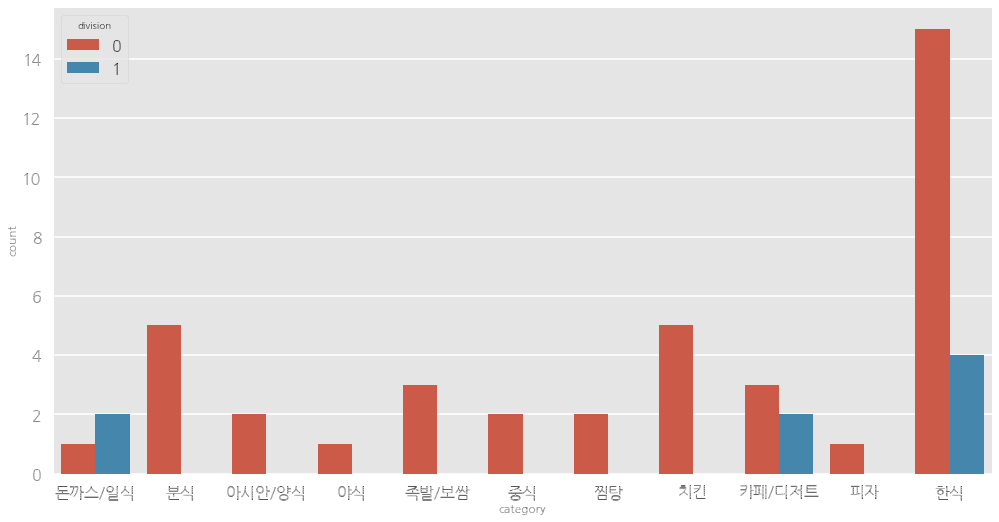

In [ ]:
plt.figure(figsize=(15,8))
p1 = sns.barplot(x='category',y='count',hue='division',data=groupby1)

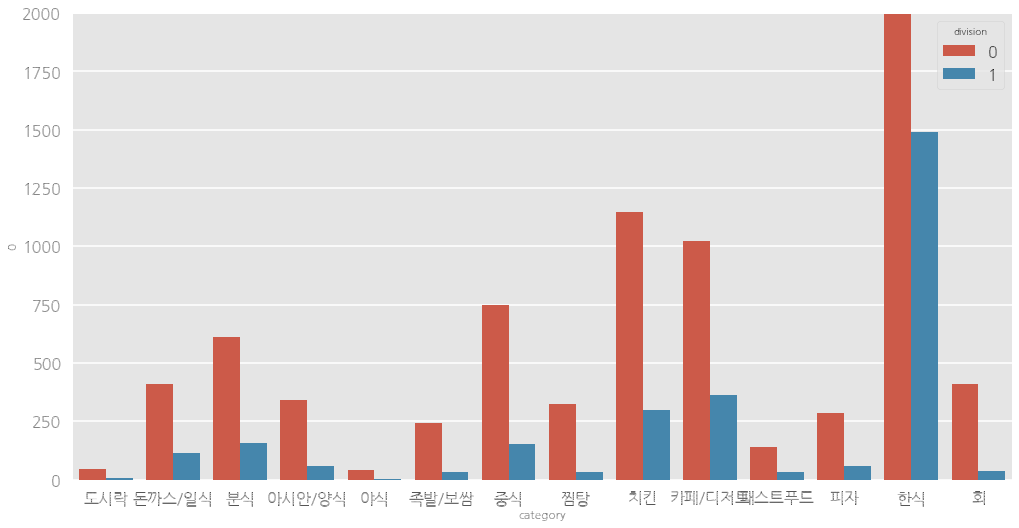

In [ ]:
plt.figure(figsize=(15,8))
plt.ylim([0,2000])
sns.barplot(x='category',y=0,hue='division',data=groupby2)

<BarContainer object of 14 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


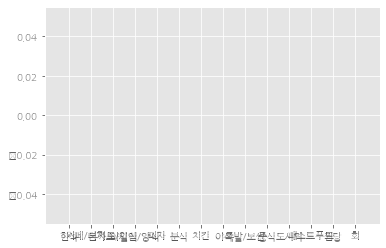

In [ ]:
plt.bar(sc_food['category'].unique(),groupby)

In [ ]:
sc_food['category'].to

0            한식
1            한식
2            한식
3        카페/디저트
4        카페/디저트
          ...  
15261         회
15262         회
15263         회
15264         회
15265         회
Name: category, Length: 15266, dtype: object

In [ ]:
plt()

In [ ]:
df_0=sc_food[sc_food['division']==0].groupby(['INDUTY_NM']).size()
df_1=sc_food[sc_food['division']==1].groupby(['INDUTY_NM']).size()

In [ ]:
len(df_1)

115

In [ ]:
label = sc_food.INDUTY_NM.unique()
label = sorted(label)
index = np.arange(len(label))
len(label)

154

In [ ]:
len(df_0)

157

ValueError: ignored

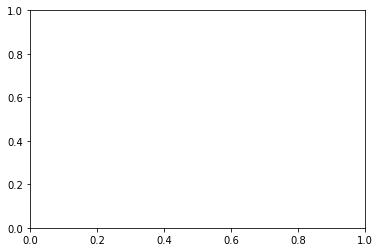

In [ ]:
p1 = plt.bar(index,df_0,color='red')
p2 = plt.bar(index,df_1, color='blue', bottom=df_0)

In [ ]:
sc_food['division']==0

0        False
1        False
2        False
3        False
4        False
         ...  
15437     True
15438     True
15439     True
15440     True
15441     True
Name: division, Length: 15442, dtype: bool

In [ ]:
sc_food[sc_food['division']==0]

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
8,169,20200102,스파게티,파파스타,852204,0
9,172,20200102,피자,피자엔치킨,851602,0
10,174,20200103,카페,미작떡집,854008,0
11,176,20200106,김밥,고봉민김밥인인천구월점,852105,0
12,196,20200109,떡볶이,즉떡만남,852306,0
...,...,...,...,...,...,...
15437,101774,20200630,횟집,왓다마차,852508,0
15438,101775,20200630,횟집,유정회타운,852508,0
15439,101776,20200630,횟집,제주횟집,852508,0
15440,101777,20200630,횟집,청호횟집,852508,0


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGoth

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

NanumBarunGothic


In [ ]:
plt.rcParams['font.family']

['NanumBarunGothic']

In [ ]:
print(mpl.matplotlib_fname())

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
print(mpl.matplotlib_fname())

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
print(mpl.rcParams['font.family'])

['NanumBarunGothic']


In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 10
plt.rc('figure', titlesize=50)

In [ ]:
groupby

0
INDUTY_NM division    
갈비탕       0          5
감자탕       0         69
          1          7
감자튀김      0          2
게요리       0         16
...                 ..
횟집        1         37
흑돼지       0          9
          1          1
흑염소       0         11
          1          1

[279 rows x 1 columns]

In [ ]:
import matplotlib.pyplot as plt

<Figure size 1080x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53461 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53888 missing from current font.
  font.set_

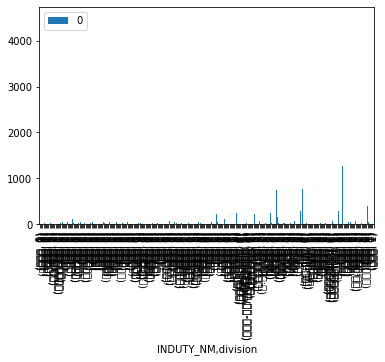

In [ ]:
plt.figure(figsize=(15,8))
groupby.plot(kind ='bar')
plt.show()

In [ ]:
st=sc_food.groupby([sc_food['INDUTY_NM'],sc_food['division']]).size()
st=pd.DataFrame(st)
st

0
INDUTY_NM        division      
갈비탕              0            5
감자탕              0           69
                 1            7
감자튀김             0            2
게요리              0           16
                 1            3
고기부페             0            7
                 1            1
고래고기             0            4
곰탕               0           22
                 1            1
곱창.양구이           0           72
                 1           13
과메기              0            3
                 1            1
과일주스전문점          0            9
                 1            2
관광음식점            0           21
                 1            1
국수               0           41
                 1            8
굴요리              0            4
                 1            1
급식               0           51
                 1            5
기사식당             0           23
                 1            3
김밥               0          105
                 1           24
꽈배기전문            0            3
                 1           12
꿩고기              0            1
낙지요리             0           35
                 1            3
냉면               0           57
                 1            2
다방               0          184
                 1           27
다슬기요리            0            3
                 1            1
닭갈비              0           41
                 1            9
닭강정              0           16
                 1            6
닭발               0           42
                 1            8
닭요리              0           47
                 1            4
대구탕              0            2
도너츠              0           13
                 1            6
도시락              0           46
                 1            7
돈가스              0           54
                 1           22
동남아음식            0            5
돼지갈비             0           47
                 1            5
돼지국밥             0           53
                 1            6
두부요리             0           15
                 1            2
떡갈비              0            4
                 1            1
떡볶이              0           44
                 1            8
라면               0            6
                 1            1
로바다야끼            0            1
막국수              0           27
                 1            1
막창               0           19
                 1            6
만두               0           37
                 1            7
말고기              0            1
매운탕              0           29
                 1            1
메밀요리             0            4
멕시코요리            0            1
멧돼지고기            0            1
문어요리             0            1
밀면               0           17
                 1            3
바.칵테일            0           15
                 1            2
바닷가재요리           0            1
반찬가게             0            3
                 1            2
백숙               0           12
버섯요리             0            7
베트남음식            0           24
                 1            6
보리밥              0           14
복어요리             0           24
                 1            1
부대찌개             0           27
                 1            5
부페               0           25
                 1            4
분식               0          434
                 1          107
불닭               0            6
                 1            2
붕어찜              0            1
브런치카페            0            7
                 1            5
비빕밥              0            3
사철.영양탕           0           60
                 1            1
삼겹살              0           87
                 1            9
삼계탕              0           42
                 1            5
샌드위치             0           18
                 1           13
샐러드전문점           0            3
                 1            1
샤브샤브             0           24
                 1            1
샤브샤브부페           0            1
설렁탕              0           22
                 1            2
소고기국밥            1            

In [ ]:
gb=pd.DataFrame(data.groupby('DLVR_STORE_INDUTY_NM').size())
gb

NameError: ignored

In [ ]:
dlvr

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296266,7750546,2020-03-31,C000237,1,C000237,S0021188,족발/보쌈,4121010200,경기도,광명시,철산동,\N,4121060000,4.12103E+11,4121010200,경기도,광명시,철산동,\N,4121059000,4.12103E+11,D0009705,3300,300,20900,2,NaN,2020-03-31 23:56,2020-03-31 23:56,2020-04-01 0:14,2020-04-01 0:18,\N
4296267,7750548,2020-03-31,C000104,1,C000102,S0021967,치킨,1156013300,서울특별시,영등포구,대림동,\N,1156070000,1.15603E+11,1162010200,서울특별시,관악구,신림동,\N,1162065500,1.16204E+11,D0002307,6300,200,26000,1,승인:신한카드,2020-03-31 23:55,2020-03-31 23:55,2020-04-01 0:17,2020-04-01 0:26,\N
4296268,7750550,2020-03-31,C000224,1,C000224,S0035329,분식,4127110400,경기도,안산시 상록구,본오동,\N,4127156000,4.12713E+11,4127310100,경기도,안산시 단원구,고잔동,\N,4127353500,4.12734E+11,D0009816,5500,200,17000,1,승인:롯데카드사,2020-03-31 23:58,2020-03-31 23:59,2020-04-01 0:18,2020-04-01 0:30,\N
4296269,7750552,2020-03-31,C000130,1,C000130,S0002286,족발/보쌈,4128112300,경기도,고양시 덕양구,화정동,\N,4128162200,4.12813E+11,4128112800,경기도,고양시 덕양구,행신동,\N,4128165500,4.12814E+11,D0002233,4000,300,35000,2,NaN,2020-03-31 23:56,2020-04-01 0:01,2020-04-01 0:16,2020-04-01 0:23,\N


In [ ]:
sc_shop_8['INDUTY_NM'].unique()

NameError: ignored

In [ ]:
sc_shop

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
0,1,20200101,CCTV,(주)실라전자,319013,1
1,2,20200101,가공식품도매(기타),송현동1986발효이야기,452199,1
2,3,20200101,가구판매(종합),더갤러리전주점,571100,1
3,4,20200101,가정부.파출부소개,모두인력파출,839103,1
4,5,20200101,가정부업알선,모두인력파출,839101,1
...,...,...,...,...,...,...
101779,101780,20200630,휴대폰,(주)엠.비텔레콤,581410,0
101780,101781,20200630,휴대폰,(주)지도,581410,0
101781,101782,20200630,휴대폰,대일통신,581410,0
101782,101783,20200630,휴대폰,이지더폰,581410,0


In [ ]:
pd.DataFrame(sc_shop["INDUTY_NM"].unique())

,0
0,CCTV
1,가공식품도매(기타)
2,가구판매(종합)
3,가정부.파출부소개
4,가정부업알선
5,간병인
6,간판제조
7,건강기구
8,건물건설(기타)
9,건물건설(종합)


In [ ]:
pd.DataFrame(sc_region["INDUTY_NM"].unique())

,0
0,부동산
1,토목공학엔지니어링
2,한식
3,보일러판매
4,돼지국밥
5,레저용품대여
6,햄버거
7,악기판매
8,지방지
9,꽃집.꽃배달


In [ ]:
sc_shop.iloc[:,2].unique()

array(['CCTV', '가공식품도매(기타)', '가구판매(종합)', ..., '벽걸이TV설치', '주짓수도장',
       '코드직물판매'], dtype=object)

In [ ]:
d1.head()

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N


In [ ]:
d1.isnull().sum()

SN                                 0
PROCESS_DT                         0
DLVR_REQUST_ENTRPS_ID              0
DLVR_REQUST_STTUS_VALUE            0
DLVR_RCEPT_ENTRPS_ID               0
DLVR_STORE_ID                      0
DLVR_STORE_INDUTY_NM               0
DLVR_STORE_LEGALDONG_CODE          0
DLVR_STORE_BRTC_NM                 0
DLVR_STORE_SIGNGU_NM               0
DLVR_STORE_LEGALDONG_NM            0
DLVR_STORE_LI_NM                   0
DLVR_STORE_ADSTRD_CODE             0
DLVR_STORE_RDNMADR_CODE            0
DLVR_DSTN_LEGALDONG_CODE           0
DLVR_DSTN_BRTC_NM                  0
DLVR_DSTN_SIGNGU_NM                0
DLVR_DSTN_LEGALDONG_NM             0
DLVR_DSTN_LI_NM                    0
DLVR_DSTN_ADSTRD_CODE              0
DLVR_DSTN_RDNMADR_CODE             0
DLVR_MAN_ID                        0
DLVR_AMOUNT                        0
CALL_RLAY_FEE_AMOUNT               0
GOODS_AMOUNT                       0
SETLE_KND_VALUE                    0
SETLE_CARD_NM                3177885
D

In [ ]:
# 지역, 상점 코드 제거
delv = d1.drop(['DLVR_STORE_LEGALDONG_CODE',
               'DLVR_STORE_RDNMADR_CODE','DLVR_DSTN_LEGALDONG_CODE',
               'DLVR_DSTN_RDNMADR_CODE'], axis=1)

# 배달 완료만 사용
delv = delv[delv['DLVR_REQUST_STTUS_VALUE'] == 1]

# 칼럼명 변경
delv.columns = ['순번', '날짜', '배달요청업체_ID', '배달상태', '배달접수업체_ID', '배달상점_ID',
               '업종명','시도명','시군구명','읍면동명','리명','상점_행정동코드','목적지_시도명','목적지_시군구명','목적지_읍면동명','목적지_리명',
               '목적지_행정동코드','기사번호','서비스금액','중계수수료금액','상품금액','결제종류','카드종류','접수시간','배차시간',
               '수령시간','완료시간','취소시간']

# 시간 데이터 전처리
delv['날짜'] = pd.to_datetime(delv['날짜'])
delv['접수시간'] = pd.to_datetime(delv['접수시간'])

delv['배달 접수 시간'] = delv['접수시간'].apply(lambda x: x.hour)
delv['배달 접수 요일'] = delv['접수시간'].dt.weekday
delv['배달 접수 평일/주말'] = delv['배달 접수 요일'].apply(lambda x: '주말' if (x == 5)|(x == 6)
                                                                                         else '평일')